# Vehicle Sales Data Analysis Project

## Introduction

In this notebook, I'm exploring a real dataset of **558,837 vehicle auction sales** from 2014-2015. My goal is to clean the data, understand what drives vehicle prices, and uncover patterns in sales trends.

### What I want to find out:
1. How should I handle missing data in a dataset this large?
2. What factors influence vehicle selling prices?
3. Are there seasonal patterns in car sales?
4. Which vehicle types and brands are most popular?
5. Do certain colors or features affect price?

### My approach:
1. **Load and explore** - See what the data looks like
2. **Clean the data** - Handle missing values and inconsistencies
3. **Analyze and visualize** - Answer my questions with charts
4. **Engineer features** - Create new columns that might be useful for future predictions

Let's start!

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [31]:
# Load the dataset
print("Loading data...")
df = pd.read_csv('car_prices.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Loading data...
Dataset loaded successfully!
Shape: (558837, 16)

First few rows:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [32]:
# Explore data structure
print("Dataset Info:")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values before cleaning:")
print(df.isnull().sum())


Dataset Info:
Total rows: 558837
Total columns: 16

Column names: ['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate']

Data types:
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

Missing values before cleaning:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice     

In [33]:
# Identify numerical and object columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nObject columns ({len(object_cols)}): {object_cols}")


Numerical columns (5): ['year', 'condition', 'odometer', 'mmr', 'sellingprice']

Object columns (11): ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']


In [34]:
# Data Cleaning Step 1: Fill missing values in numerical columns with mean
print("Step 1: Filling missing values in numerical columns with mean...")
for col in numerical_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
        print(f"  - {col}: Filled {missing_count} missing values with mean = {mean_value:.2f}")
    else:
        print(f"  - {col}: No missing values")

print("\nMissing values in numerical columns after filling:")
print(df[numerical_cols].isnull().sum())


Step 1: Filling missing values in numerical columns with mean...
  - year: No missing values
  - condition: Filled 11820 missing values with mean = 30.67
  - odometer: Filled 94 missing values with mean = 68320.02
  - mmr: Filled 38 missing values with mean = 13769.38
  - sellingprice: Filled 12 missing values with mean = 13611.36

Missing values in numerical columns after filling:
year            0
condition       0
odometer        0
mmr             0
sellingprice    0
dtype: int64


In [35]:
# Data Cleaning Step 2: Fill missing values in object columns with mode
print("Step 2: Filling missing values in object columns with mode...")
for col in object_cols:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        mode_value = df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown'
        df[col].fillna(mode_value, inplace=True)
        print(f"  - {col}: Filled {missing_count} missing values with mode = '{mode_value}'")
    else:
        print(f"  - {col}: No missing values")

print("\nMissing values in object columns after filling:")
print(df[object_cols].isnull().sum())


Step 2: Filling missing values in object columns with mode...
  - make: Filled 10301 missing values with mode = 'Ford'
  - model: Filled 10399 missing values with mode = 'Altima'
  - trim: Filled 10651 missing values with mode = 'Base'
  - body: Filled 13195 missing values with mode = 'Sedan'
  - transmission: Filled 65352 missing values with mode = 'automatic'
  - vin: Filled 4 missing values with mode = 'automatic'
  - state: No missing values
  - color: Filled 749 missing values with mode = 'black'
  - interior: Filled 749 missing values with mode = 'black'
  - seller: No missing values
  - saledate: Filled 12 missing values with mode = 'Tue Feb 10 2015 01:30:00 GMT-0800 (PST)'

Missing values in object columns after filling:
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
color           0
interior        0
seller          0
saledate        0
dtype: int64


In [36]:
# Data Cleaning Step 3: Drop rows/columns that still have issues
print("Step 3: Dropping remaining problematic rows/columns...")

# Check for any remaining missing values
remaining_missing = df.isnull().sum()
cols_with_missing = remaining_missing[remaining_missing > 0]

if len(cols_with_missing) > 0:
    print(f"Columns with remaining missing values: {cols_with_missing.to_dict()}")
    # Drop columns that are completely empty or have too many missing values (>50%)
    cols_to_drop = []
    for col in df.columns:
        missing_pct = (df[col].isnull().sum() / len(df)) * 100
        if missing_pct > 50:
            cols_to_drop.append(col)
            print(f"  - Dropping column '{col}' ({missing_pct:.2f}% missing)")
    
    if cols_to_drop:
        df.drop(columns=cols_to_drop, inplace=True)
        print(f"Dropped {len(cols_to_drop)} columns")
else:
    print("No columns with remaining missing values")

# Drop rows that still have any missing values (if any remain)
rows_before = len(df)
df.dropna(inplace=True)
rows_after = len(df)
rows_dropped = rows_before - rows_after

if rows_dropped > 0:
    print(f"Dropped {rows_dropped} rows with remaining missing values")
else:
    print("No rows needed to be dropped")

print(f"\nFinal dataset shape: {df.shape}")


Step 3: Dropping remaining problematic rows/columns...
No columns with remaining missing values
No rows needed to be dropped

Final dataset shape: (558837, 16)


In [37]:
# Verify the cleaned dataset
print("Verification of cleaned dataset:")
print(f"Shape: {df.shape}")
print(f"\nMissing values check:")
print(df.isnull().sum().sum())
if df.isnull().sum().sum() == 0:
    print("✓ No missing values remaining!")
else:
    print(f"⚠ Warning: {df.isnull().sum().sum()} missing values still present")

print(f"\nData types:")
print(df.dtypes)
print(f"\nFirst few rows of cleaned data:")
df.head()


Verification of cleaned dataset:
Shape: (558837, 16)

Missing values check:
0
✓ No missing values remaining!

Data types:
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

First few rows of cleaned data:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [38]:
# Save the cleaned dataset
output_file = 'car_prices_cleaned.csv'
df.to_csv(output_file, index=False)
print(f"Cleaned dataset saved to '{output_file}'")
print(f"Final dataset shape: {df.shape}")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")


Cleaned dataset saved to 'car_prices_cleaned.csv'
Final dataset shape: (558837, 16)
Total rows: 558837
Total columns: 16


---

## Part 2: Exploratory Data Analysis (EDA)

Now that the data is clean, let's start asking questions and creating visualizations to find patterns.

### Analysis Plan:
1. **Sales trends over time** - When do most sales happen?
2. **Seasonal patterns** - Are certain months/days/hours busier?
3. **Body type breakdown** - What vehicle types sell most?
4. **Pricing analysis** - What's the typical price range? How do prices vary?
5. **Brand & model popularity** - Who are the top manufacturers?
6. **Geographic distribution** - Which states have the most activity?
7. **Vehicle characteristics** - Age, mileage, condition effects
8. **Color preferences** - Do colors matter for pricing or popularity?
9. **Correlations** - Which factors are related to each other?

In [39]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

# Set style for better-looking plots
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Visualization libraries imported successfully!")


Visualization libraries imported successfully!


In [40]:
# Load cleaned data (or use existing df if already cleaned)
# If you've already run the cleaning cells above, df is already loaded
# Otherwise, uncomment the line below:
# df = pd.read_csv('car_prices_cleaned.csv')

print(f"Dataset shape: {df.shape}")
print(f"Date range check - Sample saledate values:")
print(df['saledate'].head(3))


Dataset shape: (558837, 16)
Date range check - Sample saledate values:
0    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1    Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2    Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
Name: saledate, dtype: object


In [41]:
# Parse saledate column to extract date and time features
print("Parsing saledate column...")

def parse_saledate(date_str):
    """Parse the saledate string to datetime"""
    try:
        # The format is like: "Tue Dec 16 2014 12:30:00 GMT-0800 (PST)"
        # Extract the date part before GMT
        date_part = date_str.split(' GMT')[0]
        # Parse it
        dt = pd.to_datetime(date_part, format='%a %b %d %Y %H:%M:%S', errors='coerce')
        return dt
    except:
        return pd.NaT

# Apply parsing
df['sale_datetime'] = df['saledate'].apply(parse_saledate)

# Extract date and time components
df['sale_date'] = df['sale_datetime'].dt.date
df['sale_year'] = df['sale_datetime'].dt.year
df['sale_month'] = df['sale_datetime'].dt.month
df['sale_day'] = df['sale_datetime'].dt.day
df['sale_dayofweek'] = df['sale_datetime'].dt.day_name()
df['sale_quarter'] = df['sale_datetime'].dt.quarter
df['sale_hour'] = df['sale_datetime'].dt.hour
df['sale_week'] = df['sale_datetime'].dt.isocalendar().week

# Check parsing results
print(f"Successfully parsed {df['sale_datetime'].notna().sum()} out of {len(df)} dates")
print(f"\n=== DATE RANGE ANALYSIS ===")
print(f"Sale Date Range: {df['sale_datetime'].min()} to {df['sale_datetime'].max()}")
print(f"Vehicle Year Range: {df['year'].min()} to {df['year'].max()}")
print(f"\nKey Insights:")
print(f"  • Sales occurred from {df['sale_datetime'].min().year} to {df['sale_datetime'].max().year}")
print(f"  • Vehicles sold range from model year {df['year'].min()} to {df['year'].max()}")
print(f"  • This represents {df['year'].max() - df['year'].min()} years of vehicle model years")
print(f"  • Sales data spans {df['sale_datetime'].max().year - df['sale_datetime'].min().year + 1} calendar years")
print(f"\nSample parsed dates:")
print(df[['saledate', 'sale_datetime', 'sale_year', 'sale_month', 'sale_dayofweek']].head())


Parsing saledate column...
Successfully parsed 558811 out of 558837 dates

=== DATE RANGE ANALYSIS ===
Sale Date Range: 2014-01-01 09:15:00 to 2015-07-21 02:30:00
Vehicle Year Range: 1982 to 2015

Key Insights:
  • Sales occurred from 2014 to 2015
  • Vehicles sold range from model year 1982 to 2015
  • This represents 33 years of vehicle model years
  • Sales data spans 2 calendar years

Sample parsed dates:
                                  saledate       sale_datetime  sale_year  \
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST) 2014-12-16 12:30:00     2014.0   
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST) 2014-12-16 12:30:00     2014.0   
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST) 2015-01-15 04:30:00     2015.0   
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST) 2015-01-29 04:30:00     2015.0   
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST) 2014-12-18 12:30:00     2014.0   

   sale_month sale_dayofweek  
0        12.0        Tuesday  
1        12.0        Tuesday  
2         1.0       Thursday  


In [42]:
# Group and standardize body types
print("Analyzing body types before grouping...")
print(f"Unique body types: {df['body'].nunique()}")
print(f"\nTop 20 body types before standardization:")
print(df['body'].value_counts().head(20))

# Standardize to title case first
df['body_standardized'] = df['body'].str.strip().str.title()

# Comprehensive body type standardization mapping
# All cab types (Crew Cab, SuperCrew, SuperCab, Regular Cab, Extended Cab, Quad Cab, etc.) -> Truck
# All sedan variations -> Sedan
# All SUV variations -> SUV
# All coupe variations -> Coupe
# All convertible variations -> Convertible
# All wagon variations -> Wagon
# All van/minivan variations -> Van
# All hatchback variations -> Hatchback

body_replacements = {
    # Sedan variations (including G Sedan)
    'Sedan': 'Sedan',
    'G Sedan': 'Sedan',
    
    # SUV variations
    'Suv': 'SUV',
    'Crossover': 'SUV',
    
    # Coupe variations (including G Coupe, Genesis Coupe, Cts Coupe, Elantra Coupe, Koup)
    'Coupe': 'Coupe',
    'G Coupe': 'Coupe',
    'Genesis Coupe': 'Coupe',
    'Cts Coupe': 'Coupe',
    'Elantra Coupe': 'Coupe',
    'Koup': 'Coupe',
    
    # Convertible variations (including G Convertible, Granturismo Convertible)
    'Convertible': 'Convertible',
    'G Convertible': 'Convertible',
    'Granturismo Convertible': 'Convertible',
    
    # Wagon variations
    'Wagon': 'Wagon',
    'Station Wagon': 'Wagon',
    
    # All Truck/Cab variations -> Truck
    'Crew Cab': 'Truck',
    'Supercrew': 'Truck',
    'Supercab': 'Truck',
    'SuperCab': 'Truck',
    'Regular Cab': 'Truck',
    'Extended Cab': 'Truck',
    'Quad Cab': 'Truck',
    'Double Cab': 'Truck',
    'Crewmax Cab': 'Truck',
    'King Cab': 'Truck',
    'Access Cab': 'Truck',
    'Club Cab': 'Truck',
    'Mega Cab': 'Truck',
    'Truck': 'Truck',
    'Pickup': 'Truck',
    
    # Van variations (including E-Series Van)
    'Van': 'Van',
    'Minivan': 'Van',
    'E-Series Van': 'Van',
    
    # Hatchback variations
    'Hatchback': 'Hatchback',
}

# Apply replacements
for old_value, new_value in body_replacements.items():
    df.loc[df['body_standardized'] == old_value, 'body_standardized'] = new_value

# Handle any remaining case variations by checking if they contain key words (case-insensitive)
def standardize_body_type(body_str):
    if pd.isna(body_str):
        return body_str
    body_lower = str(body_str).lower()
    
    # Check for cab/truck keywords
    if any(keyword in body_lower for keyword in ['cab', 'truck', 'pickup']):
        return 'Truck'
    # Check for sedan
    elif 'sedan' in body_lower:
        return 'Sedan'
    # Check for SUV
    elif any(keyword in body_lower for keyword in ['suv', 'crossover']):
        return 'SUV'
    # Check for coupe
    elif 'coupe' in body_lower:
        return 'Coupe'
    # Check for convertible
    elif 'convertible' in body_lower:
        return 'Convertible'
    # Check for wagon
    elif any(keyword in body_lower for keyword in ['wagon', 'station']):
        return 'Wagon'
    # Check for van
    elif any(keyword in body_lower for keyword in ['van', 'minivan']):
        return 'Van'
    # Check for hatchback
    elif 'hatchback' in body_lower:
        return 'Hatchback'
    else:
        # Return as is if no match (already standardized)
        return body_str

# Apply final standardization for any remaining variations
df['body_standardized'] = df['body_standardized'].apply(standardize_body_type)

print(f"\nAfter comprehensive standardization:")
print(f"Unique body types: {df['body_standardized'].nunique()}")
print(f"\nStandardized body type distribution:")
body_counts = df['body_standardized'].value_counts()
print(body_counts)
print(f"\nTotal vehicles: {body_counts.sum():,}")
print(f"\nBody type consolidation summary:")
print(f"  • All cab types (Crew Cab, SuperCrew, SuperCab, Regular Cab, Extended Cab, Quad Cab, etc.) grouped as 'Truck'")
print(f"  • All sedan variations (Sedan, sedan, G Sedan) grouped as 'Sedan'")
print(f"  • All SUV variations (SUV, suv, Crossover) grouped as 'SUV'")
print(f"  • All coupe variations grouped as 'Coupe'")
print(f"  • All convertible variations grouped as 'Convertible'")
print(f"  • All wagon variations grouped as 'Wagon'")
print(f"  • All van/minivan variations grouped as 'Van'")
print(f"  • All hatchback variations grouped as 'Hatchback'")


Analyzing body types before grouping...
Unique body types: 87

Top 20 body types before standardization:
body
Sedan           212632
SUV             119292
sedan            41906
suv              24552
Hatchback        21380
Minivan          21363
Coupe            14602
Wagon            13630
Crew Cab         13280
Convertible       8652
SuperCrew         7423
G Sedan           5999
hatchback         4857
SuperCab          4449
minivan           4166
Regular Cab       4067
Van               3958
Extended Cab      3824
Quad Cab          3436
coupe             3150
Name: count, dtype: int64

After comprehensive standardization:
Unique body types: 9

Standardized body type distribution:
body_standardized
Sedan          261955
SUV            143844
Truck           47540
Van             31959
Hatchback       26237
Coupe           20163
Wagon           16180
Convertible     10933
Navitgation        26
Name: count, dtype: int64

Total vehicles: 558,837

Body type consolidation summary:
  • Al

In [43]:
# Create additional derived features for analysis
print("Creating derived features...")

# Vehicle age at sale
df['vehicle_age'] = df['sale_year'] - df['year']

# Price difference (selling price vs MMR - Manheim Market Report)
df['price_difference'] = df['sellingprice'] - df['mmr']
df['price_difference_pct'] = ((df['sellingprice'] - df['mmr']) / df['mmr']) * 100

# Price per mile (value retention indicator)
df['price_per_mile'] = df['sellingprice'] / (df['odometer'] + 1)  # +1 to avoid division by zero

# Price categories
df['price_category'] = pd.cut(df['sellingprice'], 
                              bins=[0, 15000, 30000, 50000, 100000, float('inf')],
                              labels=['Budget', 'Mid-Range', 'Premium', 'Luxury', 'Super Luxury'])

# Age categories
df['age_category'] = pd.cut(df['vehicle_age'],
                           bins=[-1, 1, 3, 5, 10, float('inf')],
                           labels=['New', 'Recent', 'Used', 'Older', 'Vintage'])

# Odometer categories
df['odometer_category'] = pd.cut(df['odometer'],
                                 bins=[0, 10000, 30000, 60000, 100000, float('inf')],
                                 labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

print("Derived features created successfully!")
print(f"\nNew columns: vehicle_age, price_difference, price_difference_pct, price_per_mile")
print(f"Category columns: price_category, age_category, odometer_category")


Creating derived features...
Derived features created successfully!

New columns: vehicle_age, price_difference, price_difference_pct, price_per_mile
Category columns: price_category, age_category, odometer_category


### 1. Sales Trends Over Time - Understanding when vehicles sell

**Question**: Are there clear trends in sales volume and revenue over the 8-month period?

I want to see if sales are increasing, decreasing, or fluctuating. This could reveal busy seasons or market changes.

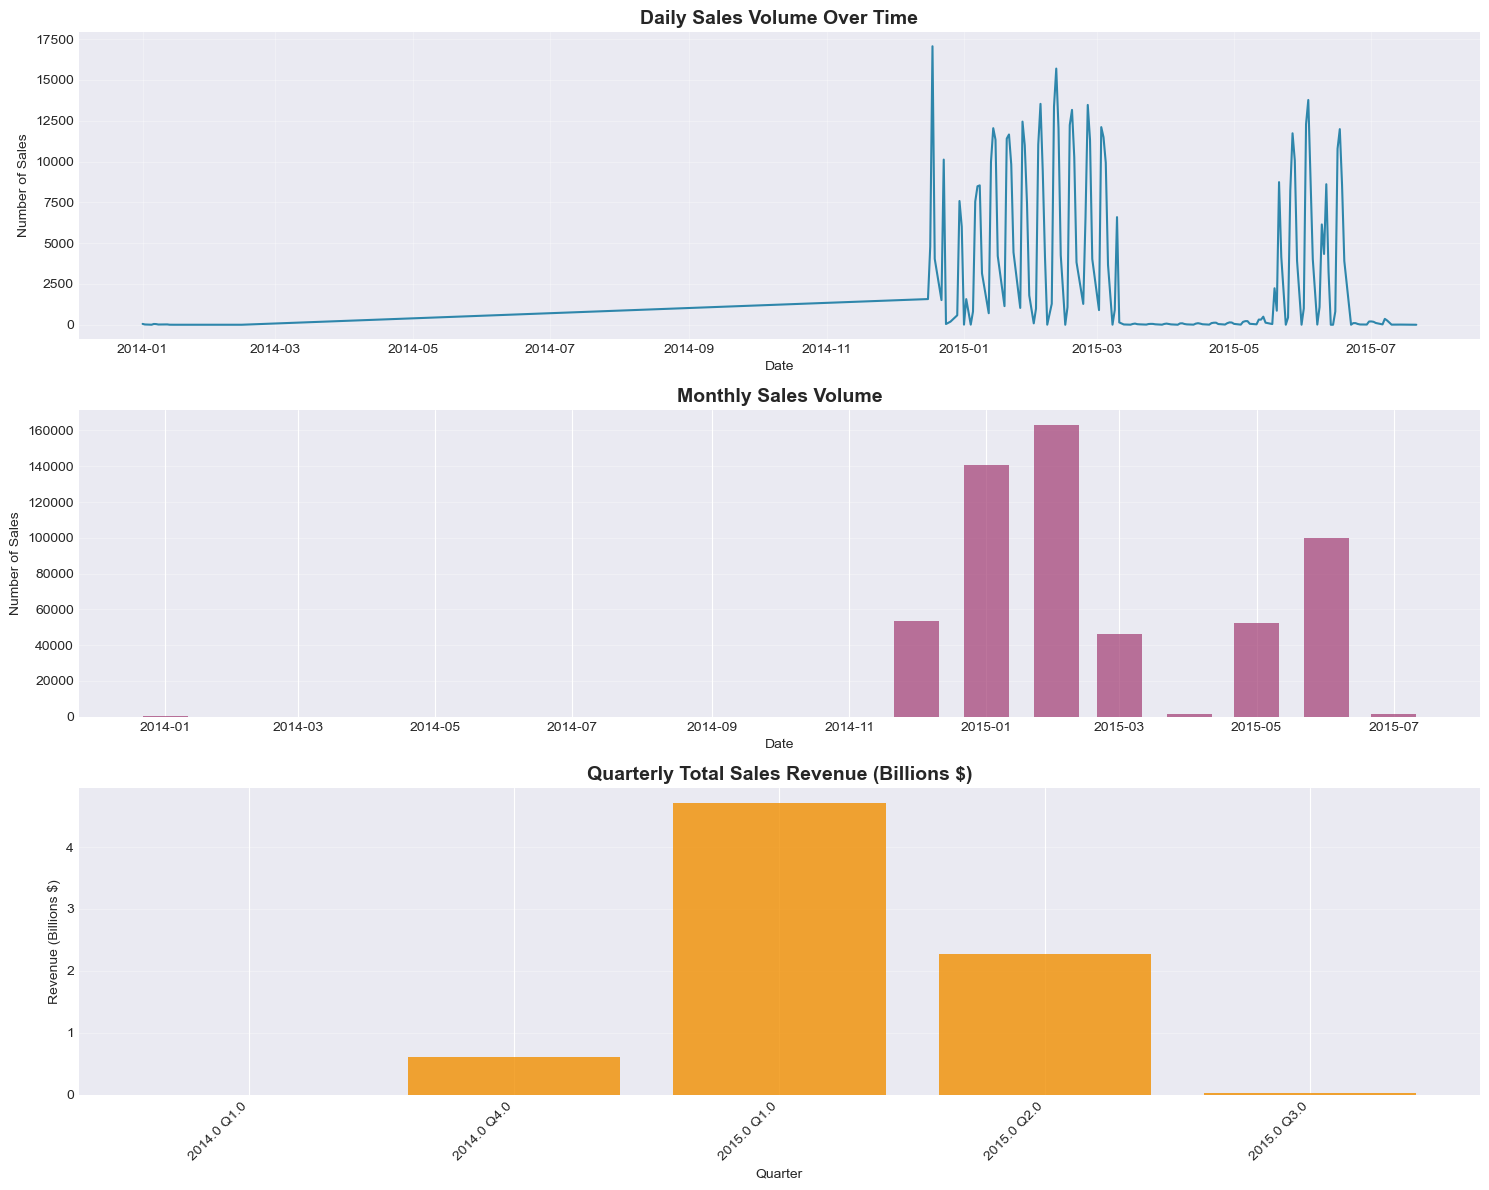

=== SALES TREND INSIGHTS ===
Total sales period: 2014-01-01 09:15:00 to 2015-07-21 02:30:00
Total number of sales: 558,837
Total revenue: $7,606,530,923.31
Average daily sales: 3248.9 vehicles
Peak daily sales: 17065 vehicles on 2014-12-18

Monthly Statistics:
  Average monthly sales: 55881 vehicles
  Average monthly revenue: $760,617,562.33

Quarterly Statistics:
  Average quarterly revenue: $1,521,235,124.66
  Best quarter: 2015.0 Q1.0 with $4,709,597,203.31


In [44]:
# Sales trend over time - Daily, Monthly, Quarterly
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Daily sales count
daily_sales = df.groupby('sale_date').size().reset_index(name='sales_count')
daily_sales['sale_date'] = pd.to_datetime(daily_sales['sale_date'])
axes[0].plot(daily_sales['sale_date'], daily_sales['sales_count'], linewidth=1.5, color='#2E86AB')
axes[0].set_title('Daily Sales Volume Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Sales')
axes[0].grid(True, alpha=0.3)

# Monthly sales count and revenue
monthly_sales = df.groupby(['sale_year', 'sale_month']).agg({
    'sellingprice': ['count', 'sum', 'mean']
}).reset_index()
monthly_sales.columns = ['year', 'month', 'sales_count', 'total_revenue', 'avg_price']
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))
axes[1].bar(monthly_sales['date'], monthly_sales['sales_count'], width=20, color='#A23B72', alpha=0.7)
axes[1].set_title('Monthly Sales Volume', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Sales')
axes[1].grid(True, alpha=0.3, axis='y')

# Quarterly sales revenue
quarterly_sales = df.groupby(['sale_year', 'sale_quarter']).agg({
    'sellingprice': ['sum', 'mean', 'count']
}).reset_index()
quarterly_sales.columns = ['year', 'quarter', 'total_revenue', 'avg_price', 'sales_count']
quarterly_sales['quarter_label'] = quarterly_sales['year'].astype(str) + ' Q' + quarterly_sales['quarter'].astype(str)
axes[2].bar(range(len(quarterly_sales)), quarterly_sales['total_revenue']/1e9, color='#F18F01', alpha=0.8)
axes[2].set_title('Quarterly Total Sales Revenue (Billions $)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Quarter')
axes[2].set_ylabel('Revenue (Billions $)')
axes[2].set_xticks(range(len(quarterly_sales)))
axes[2].set_xticklabels(quarterly_sales['quarter_label'], rotation=45, ha='right')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('sales_trends_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Print key insights
print("=== SALES TREND INSIGHTS ===")
print(f"Total sales period: {df['sale_datetime'].min()} to {df['sale_datetime'].max()}")
print(f"Total number of sales: {len(df):,}")
print(f"Total revenue: ${df['sellingprice'].sum():,.2f}")
print(f"Average daily sales: {daily_sales['sales_count'].mean():.1f} vehicles")
print(f"Peak daily sales: {daily_sales['sales_count'].max()} vehicles on {daily_sales.loc[daily_sales['sales_count'].idxmax(), 'sale_date'].date()}")
print(f"\nMonthly Statistics:")
print(f"  Average monthly sales: {monthly_sales['sales_count'].mean():.0f} vehicles")
print(f"  Average monthly revenue: ${monthly_sales['total_revenue'].mean():,.2f}")
print(f"\nQuarterly Statistics:")
print(f"  Average quarterly revenue: ${quarterly_sales['total_revenue'].mean():,.2f}")
print(f"  Best quarter: {quarterly_sales.loc[quarterly_sales['total_revenue'].idxmax(), 'quarter_label']} with ${quarterly_sales['total_revenue'].max():,.2f}")


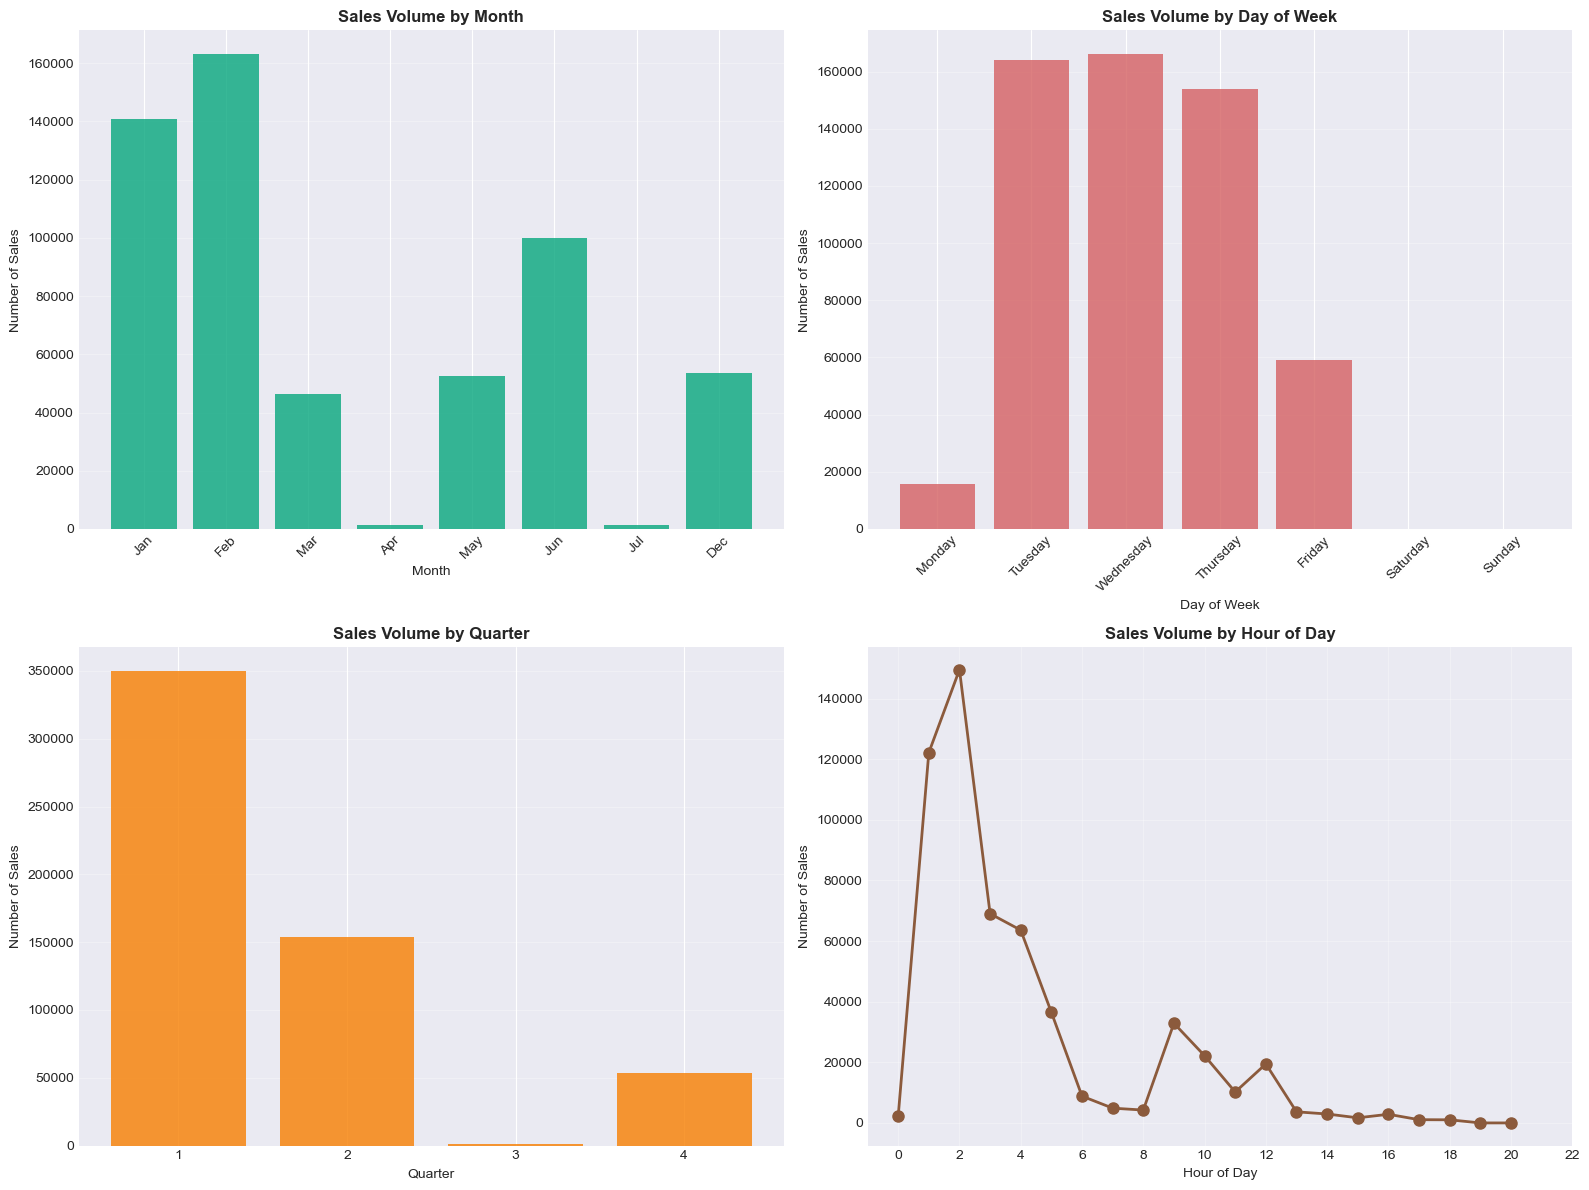


=== SEASONAL PATTERN INSIGHTS ===
Best month for sales: Feb (163,065 sales)
Worst month for sales: Jul (1,300 sales)

Best day of week: Wednesday (166,069 sales)
Worst day of week: Saturday (7 sales)

Best quarter: Q1.0 (350,157 sales)
Peak sales hour: 2.0:00 (149,509 sales)


In [45]:
# Seasonal patterns analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sales by month
monthly_pattern = df.groupby('sale_month').agg({
    'sellingprice': ['count', 'sum', 'mean']
}).reset_index()
monthly_pattern.columns = ['month', 'sales_count', 'total_revenue', 'avg_price']
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_pattern['month_name'] = [month_names[int(m)-1] for m in monthly_pattern['month']]

axes[0, 0].bar(monthly_pattern['month_name'], monthly_pattern['sales_count'], color='#06A77D', alpha=0.8)
axes[0, 0].set_title('Sales Volume by Month', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Sales')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Sales by day of week
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_pattern = df.groupby('sale_dayofweek').agg({
    'sellingprice': ['count', 'sum', 'mean']
}).reset_index()
dow_pattern.columns = ['day', 'sales_count', 'total_revenue', 'avg_price']
dow_pattern['day'] = pd.Categorical(dow_pattern['day'], categories=dow_order, ordered=True)
dow_pattern = dow_pattern.sort_values('day')

axes[0, 1].bar(dow_pattern['day'], dow_pattern['sales_count'], color='#D56062', alpha=0.8)
axes[0, 1].set_title('Sales Volume by Day of Week', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Number of Sales')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Sales by quarter
quarterly_pattern = df.groupby('sale_quarter').agg({
    'sellingprice': ['count', 'sum', 'mean']
}).reset_index()
quarterly_pattern.columns = ['quarter', 'sales_count', 'total_revenue', 'avg_price']

axes[1, 0].bar(quarterly_pattern['quarter'], quarterly_pattern['sales_count'], color='#F77F00', alpha=0.8)
axes[1, 0].set_title('Sales Volume by Quarter', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Number of Sales')
axes[1, 0].set_xticks([1, 2, 3, 4])
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Sales by hour of day
hourly_pattern = df.groupby('sale_hour').agg({
    'sellingprice': ['count', 'sum', 'mean']
}).reset_index()
hourly_pattern.columns = ['hour', 'sales_count', 'total_revenue', 'avg_price']

axes[1, 1].plot(hourly_pattern['hour'], hourly_pattern['sales_count'], marker='o', linewidth=2, markersize=8, color='#8B5A3C')
axes[1, 1].set_title('Sales Volume by Hour of Day', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Hour of Day')
axes[1, 1].set_ylabel('Number of Sales')
axes[1, 1].set_xticks(range(0, 24, 2))
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('seasonal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

# Print seasonal insights
print("\n=== SEASONAL PATTERN INSIGHTS ===")
print(f"Best month for sales: {monthly_pattern.loc[monthly_pattern['sales_count'].idxmax(), 'month_name']} ({monthly_pattern['sales_count'].max():,} sales)")
print(f"Worst month for sales: {monthly_pattern.loc[monthly_pattern['sales_count'].idxmin(), 'month_name']} ({monthly_pattern['sales_count'].min():,} sales)")
print(f"\nBest day of week: {dow_pattern.loc[dow_pattern['sales_count'].idxmax(), 'day']} ({dow_pattern['sales_count'].max():,} sales)")
print(f"Worst day of week: {dow_pattern.loc[dow_pattern['sales_count'].idxmin(), 'day']} ({dow_pattern['sales_count'].min():,} sales)")
print(f"\nBest quarter: Q{quarterly_pattern.loc[quarterly_pattern['sales_count'].idxmax(), 'quarter']} ({quarterly_pattern['sales_count'].max():,} sales)")
print(f"Peak sales hour: {hourly_pattern.loc[hourly_pattern['sales_count'].idxmax(), 'hour']}:00 ({hourly_pattern['sales_count'].max():,} sales)")


### 2. Seasonal Patterns - Finding the best and worst times for sales

**Question**: Do sales peak on certain days of the week, months, or times of day?

Understanding seasonality helps explain why some periods are busier than others.

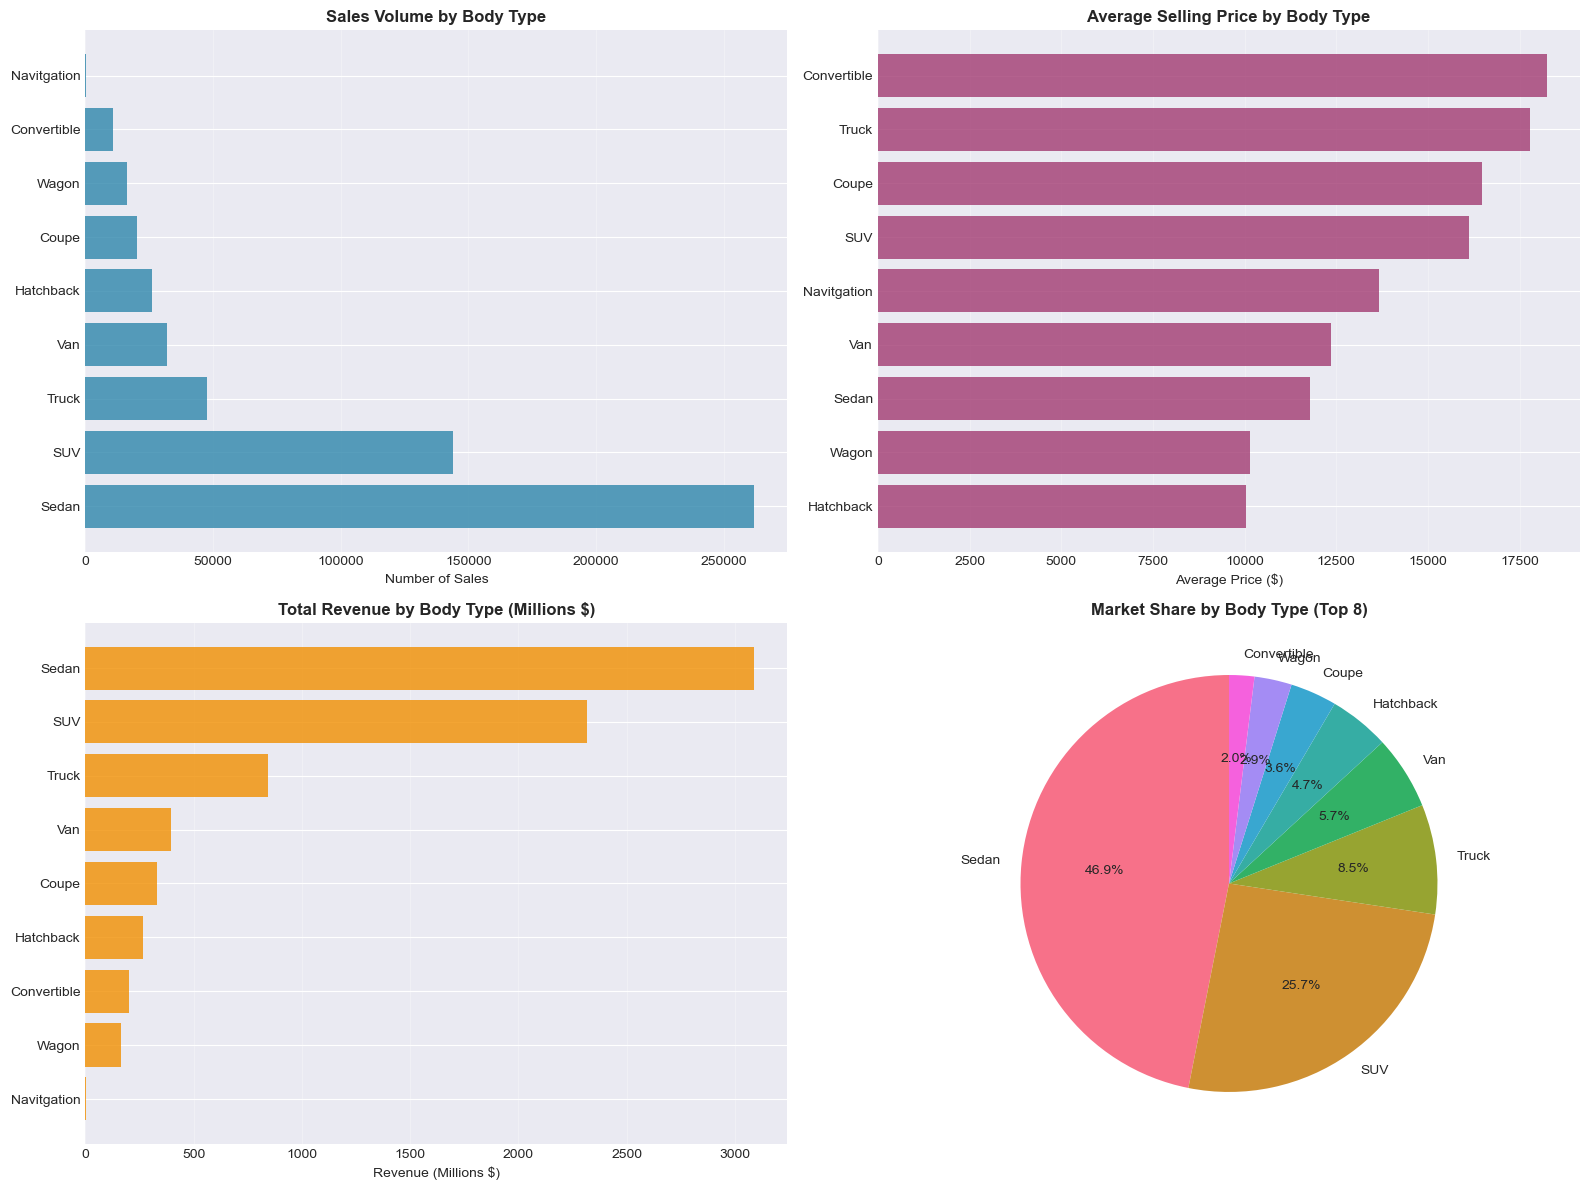

=== BODY TYPE INSIGHTS ===

Most popular body type: Sedan (261,955 sales)
Highest average price: Convertible ($18,236.54)
Highest total revenue: Sedan ($3,088,593,318.95)

Body Type Performance Summary:
  body_type  sales_count    avg_price  total_revenue
      Sedan       261955 11790.549212   3.088593e+09
        SUV       143844 16115.916681   2.318178e+09
      Truck        47540 17773.048065   8.449307e+08
        Van        31959 12355.712851   3.948762e+08
  Hatchback        26237 10045.733506   2.635699e+08
      Coupe        20163 16484.368150   3.323743e+08
      Wagon        16180 10152.853978   1.642732e+08
Convertible        10933 18236.536266   1.993801e+08
Navitgation           26 13665.384615   3.553000e+05


In [46]:
# Body type analysis
body_analysis = df.groupby('body_standardized').agg({
    'sellingprice': ['count', 'sum', 'mean', 'median'],
    'odometer': 'mean',
    'vehicle_age': 'mean'
}).reset_index()
body_analysis.columns = ['body_type', 'sales_count', 'total_revenue', 'avg_price', 'median_price', 'avg_odometer', 'avg_age']
body_analysis = body_analysis.sort_values('sales_count', ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sales count by body type
axes[0, 0].barh(body_analysis['body_type'], body_analysis['sales_count'], color='#2E86AB', alpha=0.8)
axes[0, 0].set_title('Sales Volume by Body Type', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Sales')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Average price by body type
body_analysis_price = body_analysis.sort_values('avg_price', ascending=True)
axes[0, 1].barh(body_analysis_price['body_type'], body_analysis_price['avg_price'], color='#A23B72', alpha=0.8)
axes[0, 1].set_title('Average Selling Price by Body Type', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Average Price ($)')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Total revenue by body type
body_analysis_rev = body_analysis.sort_values('total_revenue', ascending=True)
axes[1, 0].barh(body_analysis_rev['body_type'], body_analysis_rev['total_revenue']/1e6, color='#F18F01', alpha=0.8)
axes[1, 0].set_title('Total Revenue by Body Type (Millions $)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Revenue (Millions $)')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Pie chart of market share
top_bodies = body_analysis.head(8)  # Top 8 body types
axes[1, 1].pie(top_bodies['sales_count'], labels=top_bodies['body_type'], autopct='%1.1f%%', 
               startangle=90, colors=sns.color_palette("husl", len(top_bodies)))
axes[1, 1].set_title('Market Share by Body Type (Top 8)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('body_type_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=== BODY TYPE INSIGHTS ===")
print(f"\nMost popular body type: {body_analysis.iloc[0]['body_type']} ({body_analysis.iloc[0]['sales_count']:,} sales)")
print(f"Highest average price: {body_analysis.loc[body_analysis['avg_price'].idxmax(), 'body_type']} (${body_analysis['avg_price'].max():,.2f})")
print(f"Highest total revenue: {body_analysis.loc[body_analysis['total_revenue'].idxmax(), 'body_type']} (${body_analysis['total_revenue'].max():,.2f})")
print(f"\nBody Type Performance Summary:")
print(body_analysis[['body_type', 'sales_count', 'avg_price', 'total_revenue']].to_string(index=False))


### 3. Body Type Analysis - Which vehicle types are most popular?

**Question**: What's the market share of different body types (Sedan, SUV, Truck, etc.)?

This shows what consumers are buying and which categories generate the most revenue.

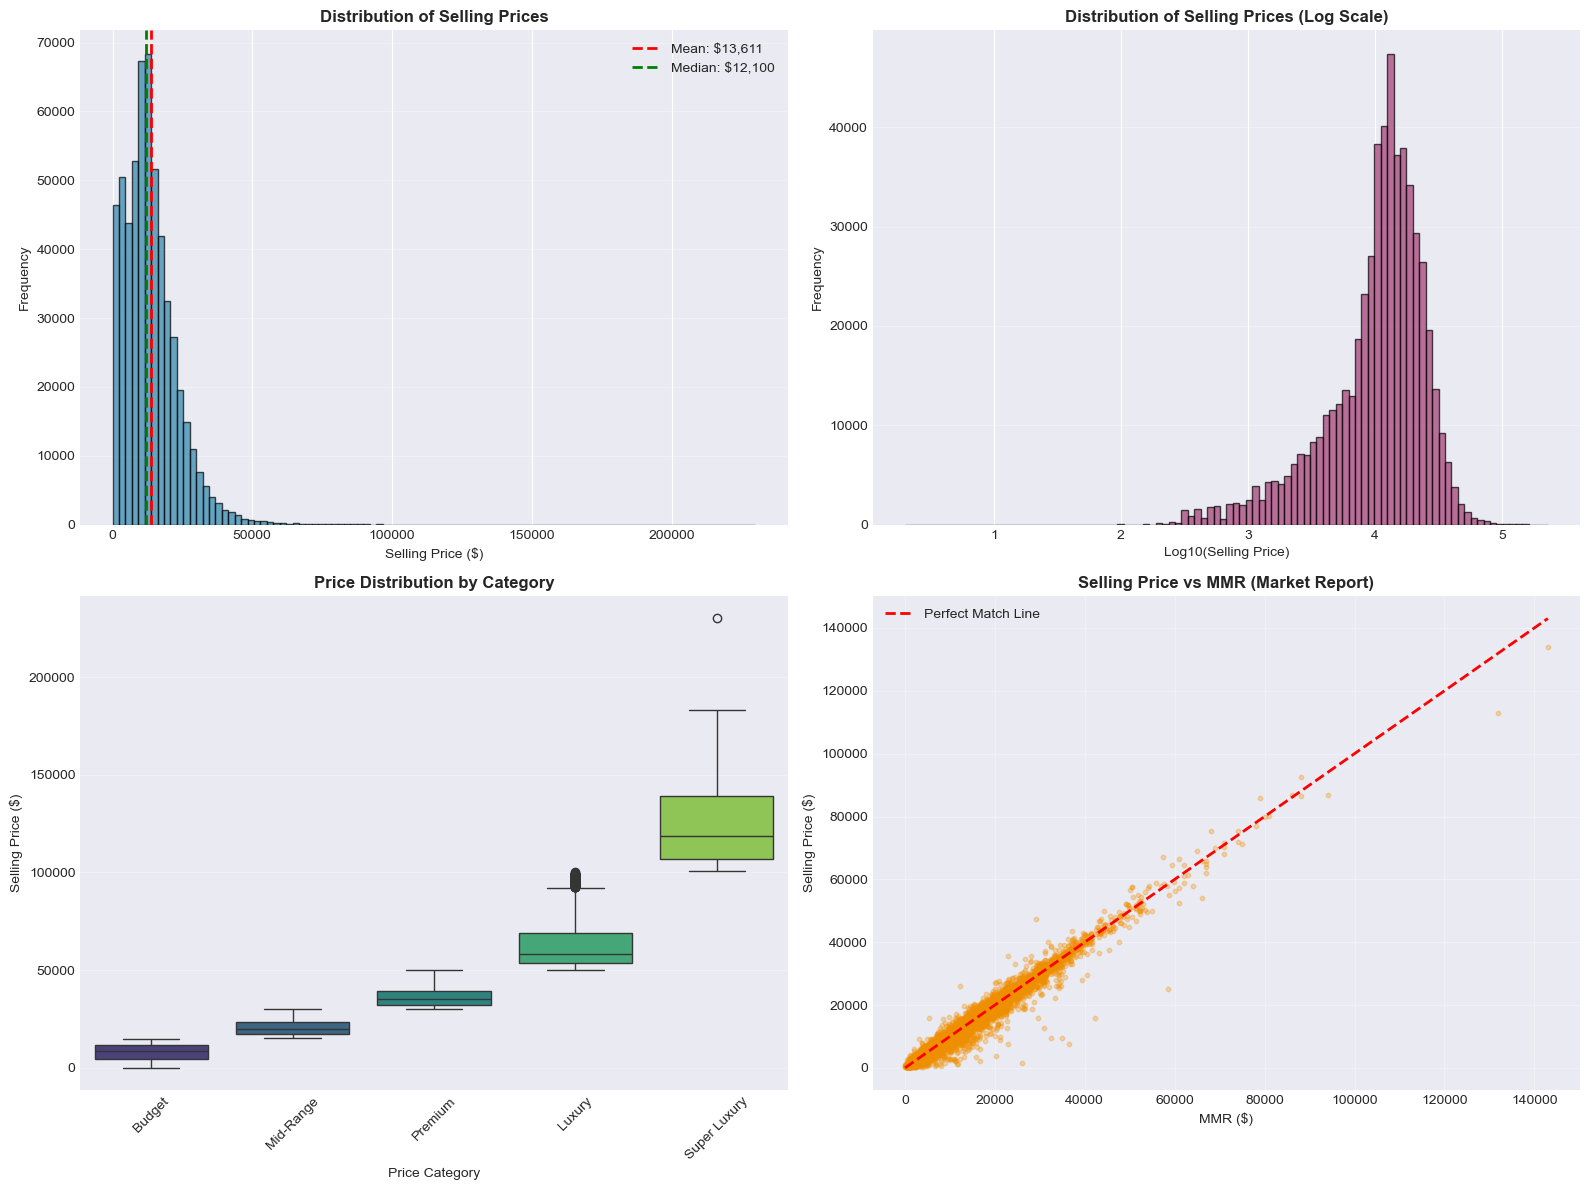

=== PRICE ANALYSIS INSIGHTS ===
Price Statistics:
  Mean: $13,611.36
  Median: $12,100.00
  Std Dev: $9,749.40
  Min: $1.00
  Max: $230,000.00
  25th percentile: $6,900.00
  75th percentile: $18,200.00

Price vs MMR:
  Average difference: $-158.02
  Average % difference: -0.66%
  Sales above MMR: 261,170 (46.7%)
  Sales below MMR: 286,444 (51.3%)

Price Category Distribution:
price_category
Budget          359196
Mid-Range       169780
Premium          26423
Luxury            3272
Super Luxury       166
Name: count, dtype: int64


In [47]:
# Price distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram of selling prices
axes[0, 0].hist(df['sellingprice'], bins=100, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of Selling Prices', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Selling Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['sellingprice'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["sellingprice"].mean():,.0f}')
axes[0, 0].axvline(df['sellingprice'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df["sellingprice"].median():,.0f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Log scale histogram (better for wide price ranges)
axes[0, 1].hist(np.log10(df['sellingprice'] + 1), bins=100, color='#A23B72', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Selling Prices (Log Scale)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Log10(Selling Price)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Box plot by price category
price_cat_order = ['Budget', 'Mid-Range', 'Premium', 'Luxury', 'Super Luxury']
df_price_cat = df[df['price_category'].notna()].copy()
df_price_cat['price_category'] = pd.Categorical(df_price_cat['price_category'], categories=price_cat_order, ordered=True)
sns.boxplot(data=df_price_cat, x='price_category', y='sellingprice', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Price Distribution by Category', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Price Category')
axes[1, 0].set_ylabel('Selling Price ($)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Price vs MMR comparison
sample_size = min(10000, len(df))
sample_df = df.sample(n=sample_size, random_state=42)
axes[1, 1].scatter(sample_df['mmr'], sample_df['sellingprice'], alpha=0.3, s=10, color='#F18F01')
axes[1, 1].plot([sample_df['mmr'].min(), sample_df['mmr'].max()], 
                [sample_df['mmr'].min(), sample_df['mmr'].max()], 
                'r--', linewidth=2, label='Perfect Match Line')
axes[1, 1].set_title('Selling Price vs MMR (Market Report)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('MMR ($)')
axes[1, 1].set_ylabel('Selling Price ($)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=== PRICE ANALYSIS INSIGHTS ===")
print(f"Price Statistics:")
print(f"  Mean: ${df['sellingprice'].mean():,.2f}")
print(f"  Median: ${df['sellingprice'].median():,.2f}")
print(f"  Std Dev: ${df['sellingprice'].std():,.2f}")
print(f"  Min: ${df['sellingprice'].min():,.2f}")
print(f"  Max: ${df['sellingprice'].max():,.2f}")
print(f"  25th percentile: ${df['sellingprice'].quantile(0.25):,.2f}")
print(f"  75th percentile: ${df['sellingprice'].quantile(0.75):,.2f}")
print(f"\nPrice vs MMR:")
print(f"  Average difference: ${df['price_difference'].mean():,.2f}")
print(f"  Average % difference: {df['price_difference_pct'].mean():.2f}%")
print(f"  Sales above MMR: {(df['price_difference'] > 0).sum():,} ({(df['price_difference'] > 0).sum()/len(df)*100:.1f}%)")
print(f"  Sales below MMR: {(df['price_difference'] < 0).sum():,} ({(df['price_difference'] < 0).sum()/len(df)*100:.1f}%)")
print(f"\nPrice Category Distribution:")
print(df['price_category'].value_counts().sort_index())


### 4. Price Analysis - Understanding the price distribution

**Question**: What's the typical price? How spread out are prices?

I'll look at the distribution, compare selling prices to market values (MMR), and see how vehicles are categorized by price range.

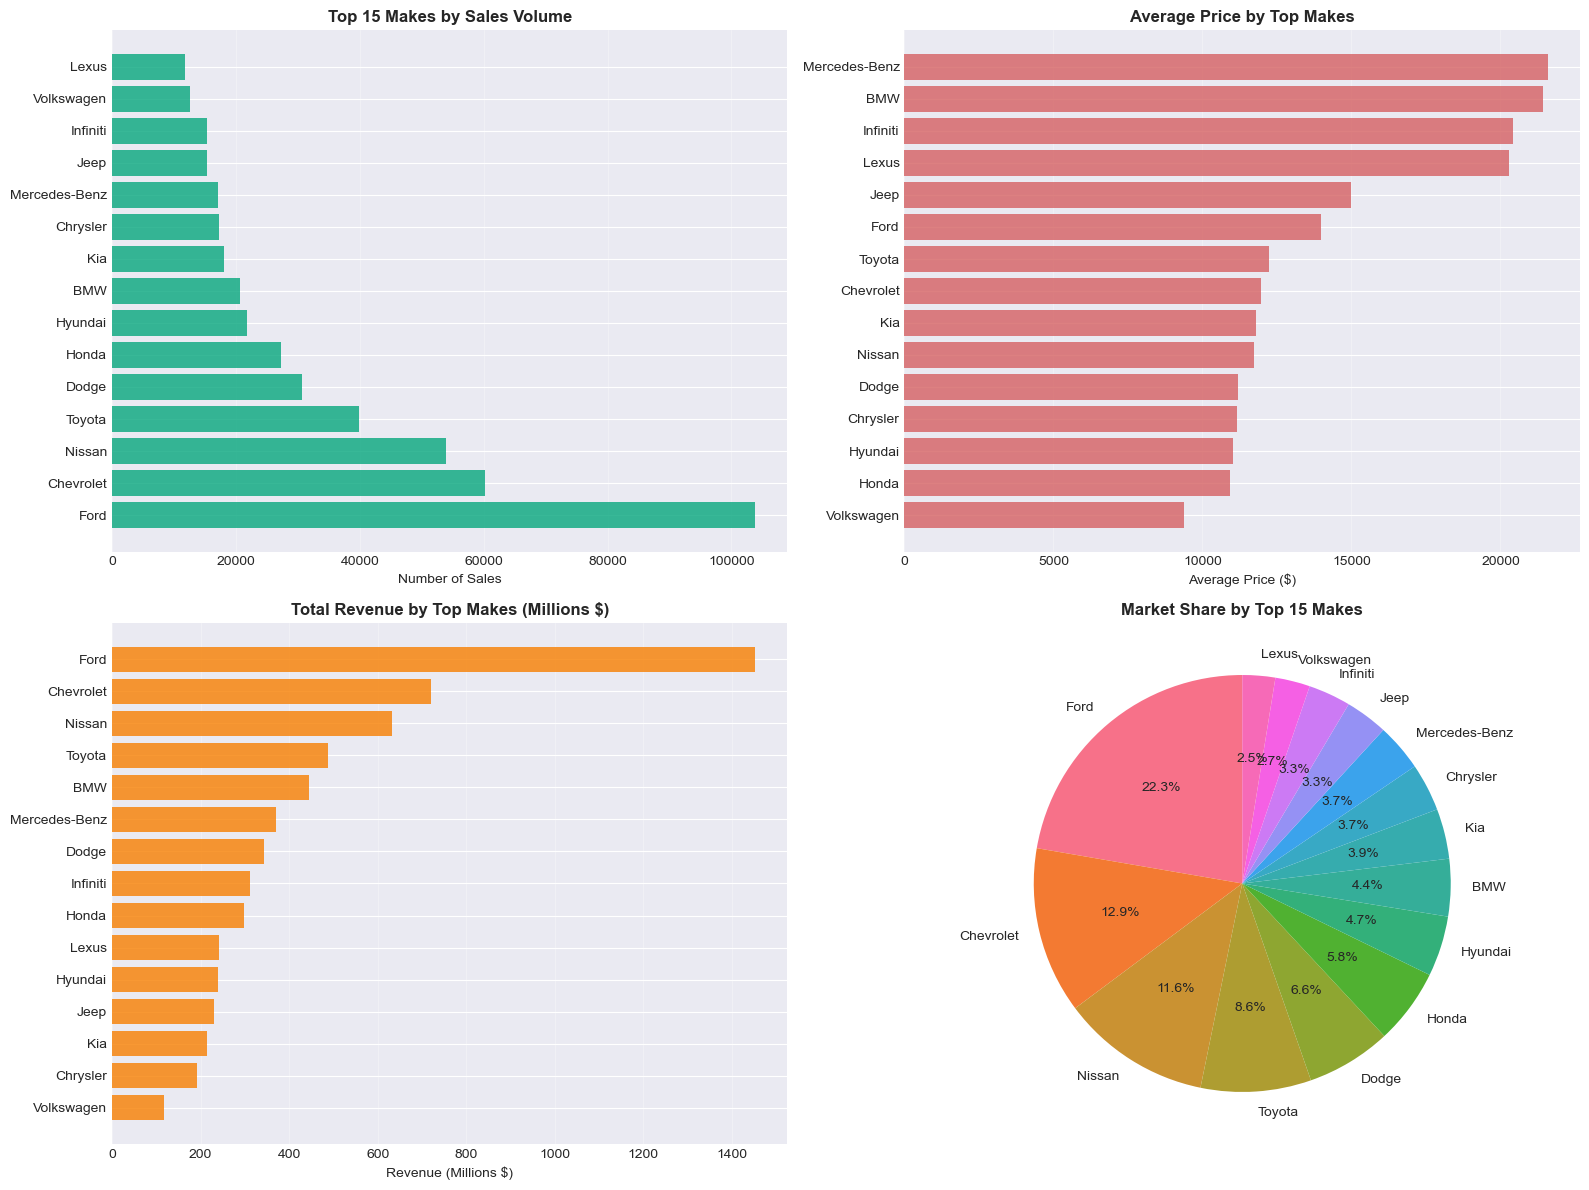

=== MAKE ANALYSIS INSIGHTS ===
Total unique makes: 96

Top 5 Makes by Sales Volume:
     make  sales_count    avg_price  total_revenue
     Ford       103855 13987.523965   1.452674e+09
Chevrolet        60197 11977.397528   7.210034e+08
   Nissan        53946 11739.015960   6.332730e+08
   Toyota        39871 12249.321813   4.883927e+08
    Dodge        30710 11206.959190   3.441657e+08

Top 5 Makes by Average Price:
       make     avg_price  sales_count
Rolls-Royce 153488.235294           17
    Ferrari 127210.526316           19
Lamborghini 112625.000000            4
    Bentley  74367.672414          116
  airstream  71000.000000            1

Top 5 Makes by Total Revenue:
     make  total_revenue  sales_count
     Ford   1.452674e+09       103855
Chevrolet   7.210034e+08        60197
   Nissan   6.332730e+08        53946
   Toyota   4.883927e+08        39871
      BMW   4.442546e+08        20719


In [48]:
# Top makes analysis
make_analysis = df.groupby('make').agg({
    'sellingprice': ['count', 'sum', 'mean'],
    'odometer': 'mean',
    'vehicle_age': 'mean'
}).reset_index()
make_analysis.columns = ['make', 'sales_count', 'total_revenue', 'avg_price', 'avg_odometer', 'avg_age']
make_analysis = make_analysis.sort_values('sales_count', ascending=False)

# Top 15 makes
top_makes = make_analysis.head(15)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sales count by top makes
axes[0, 0].barh(top_makes['make'], top_makes['sales_count'], color='#06A77D', alpha=0.8)
axes[0, 0].set_title('Top 15 Makes by Sales Volume', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Sales')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Average price by top makes
top_makes_price = top_makes.sort_values('avg_price', ascending=True)
axes[0, 1].barh(top_makes_price['make'], top_makes_price['avg_price'], color='#D56062', alpha=0.8)
axes[0, 1].set_title('Average Price by Top Makes', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Average Price ($)')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Total revenue by top makes
top_makes_rev = top_makes.sort_values('total_revenue', ascending=True)
axes[1, 0].barh(top_makes_rev['make'], top_makes_rev['total_revenue']/1e6, color='#F77F00', alpha=0.8)
axes[1, 0].set_title('Total Revenue by Top Makes (Millions $)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Revenue (Millions $)')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Market share pie chart
axes[1, 1].pie(top_makes['sales_count'], labels=top_makes['make'], autopct='%1.1f%%', 
               startangle=90, colors=sns.color_palette("husl", len(top_makes)))
axes[1, 1].set_title('Market Share by Top 15 Makes', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('make_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=== MAKE ANALYSIS INSIGHTS ===")
print(f"Total unique makes: {df['make'].nunique()}")
print(f"\nTop 5 Makes by Sales Volume:")
print(top_makes[['make', 'sales_count', 'avg_price', 'total_revenue']].head().to_string(index=False))
print(f"\nTop 5 Makes by Average Price:")
print(make_analysis.sort_values('avg_price', ascending=False)[['make', 'avg_price', 'sales_count']].head().to_string(index=False))
print(f"\nTop 5 Makes by Total Revenue:")
print(make_analysis.sort_values('total_revenue', ascending=False)[['make', 'total_revenue', 'sales_count']].head().to_string(index=False))


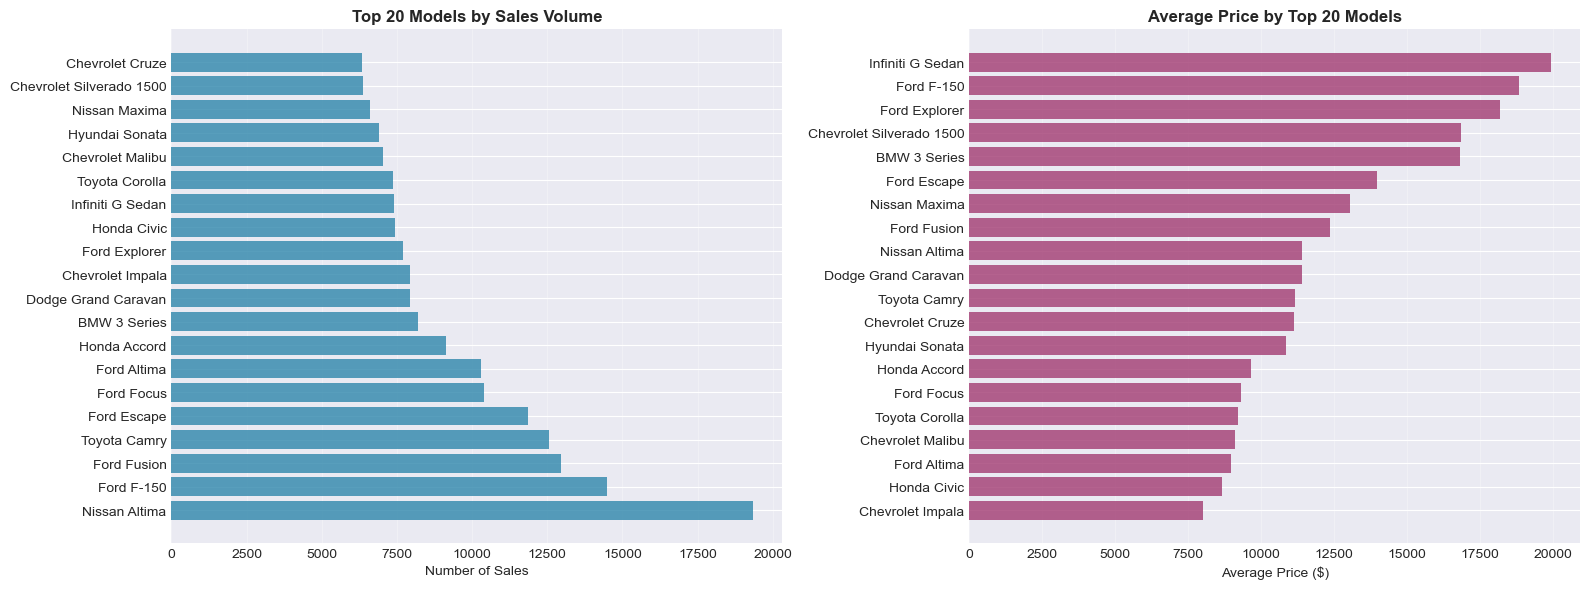

=== MODEL ANALYSIS INSIGHTS ===
Total unique models: 1022

Top 10 Models by Sales Volume:
  make         model  sales_count    avg_price
Nissan        Altima        19349 11421.055765
  Ford         F-150        14479 18832.085020
  Ford        Fusion        12946 12353.323912
Toyota         Camry        12545 11179.498446
  Ford        Escape        11861 13985.734930
  Ford         Focus        10394  9318.359246
  Ford        Altima        10301  8965.744394
 Honda        Accord         9127  9657.913334
   BMW      3 Series         8204 16809.633106
 Dodge Grand Caravan         7941 11412.421987

Top 10 Models by Average Price:
         make                 model     avg_price  sales_count
      Ferrari            458 Italia 183000.000000            1
Mercedes-Benz            SLS AMG GT 156500.000000            1
          BMW                    i8 154222.222222            9
      Bentley           Flying Spur 154000.000000            2
  Rolls-Royce                 Ghost 153488.23

In [49]:
# Top models analysis
model_analysis = df.groupby(['make', 'model']).agg({
    'sellingprice': ['count', 'sum', 'mean']
}).reset_index()
model_analysis.columns = ['make', 'model', 'sales_count', 'total_revenue', 'avg_price']
model_analysis = model_analysis.sort_values('sales_count', ascending=False)

# Top 20 models
top_models = model_analysis.head(20)
top_models['make_model'] = top_models['make'] + ' ' + top_models['model']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Sales count by top models
axes[0].barh(top_models['make_model'], top_models['sales_count'], color='#2E86AB', alpha=0.8)
axes[0].set_title('Top 20 Models by Sales Volume', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Sales')
axes[0].grid(True, alpha=0.3, axis='x')

# Average price by top models
top_models_price = top_models.sort_values('avg_price', ascending=True)
axes[1].barh(top_models_price['make_model'], top_models_price['avg_price'], color='#A23B72', alpha=0.8)
axes[1].set_title('Average Price by Top 20 Models', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Average Price ($)')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('model_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=== MODEL ANALYSIS INSIGHTS ===")
print(f"Total unique models: {df.groupby(['make', 'model']).ngroups}")
print(f"\nTop 10 Models by Sales Volume:")
print(top_models[['make', 'model', 'sales_count', 'avg_price']].head(10).to_string(index=False))
print(f"\nTop 10 Models by Average Price:")
print(model_analysis.sort_values('avg_price', ascending=False)[['make', 'model', 'avg_price', 'sales_count']].head(10).to_string(index=False))


### 5. Make & Model Analysis - Who are the top brands?

**Question**: Which manufacturers sell the most vehicles? Which generate the most revenue?

Brand popularity reveals market leaders and consumer preferences.

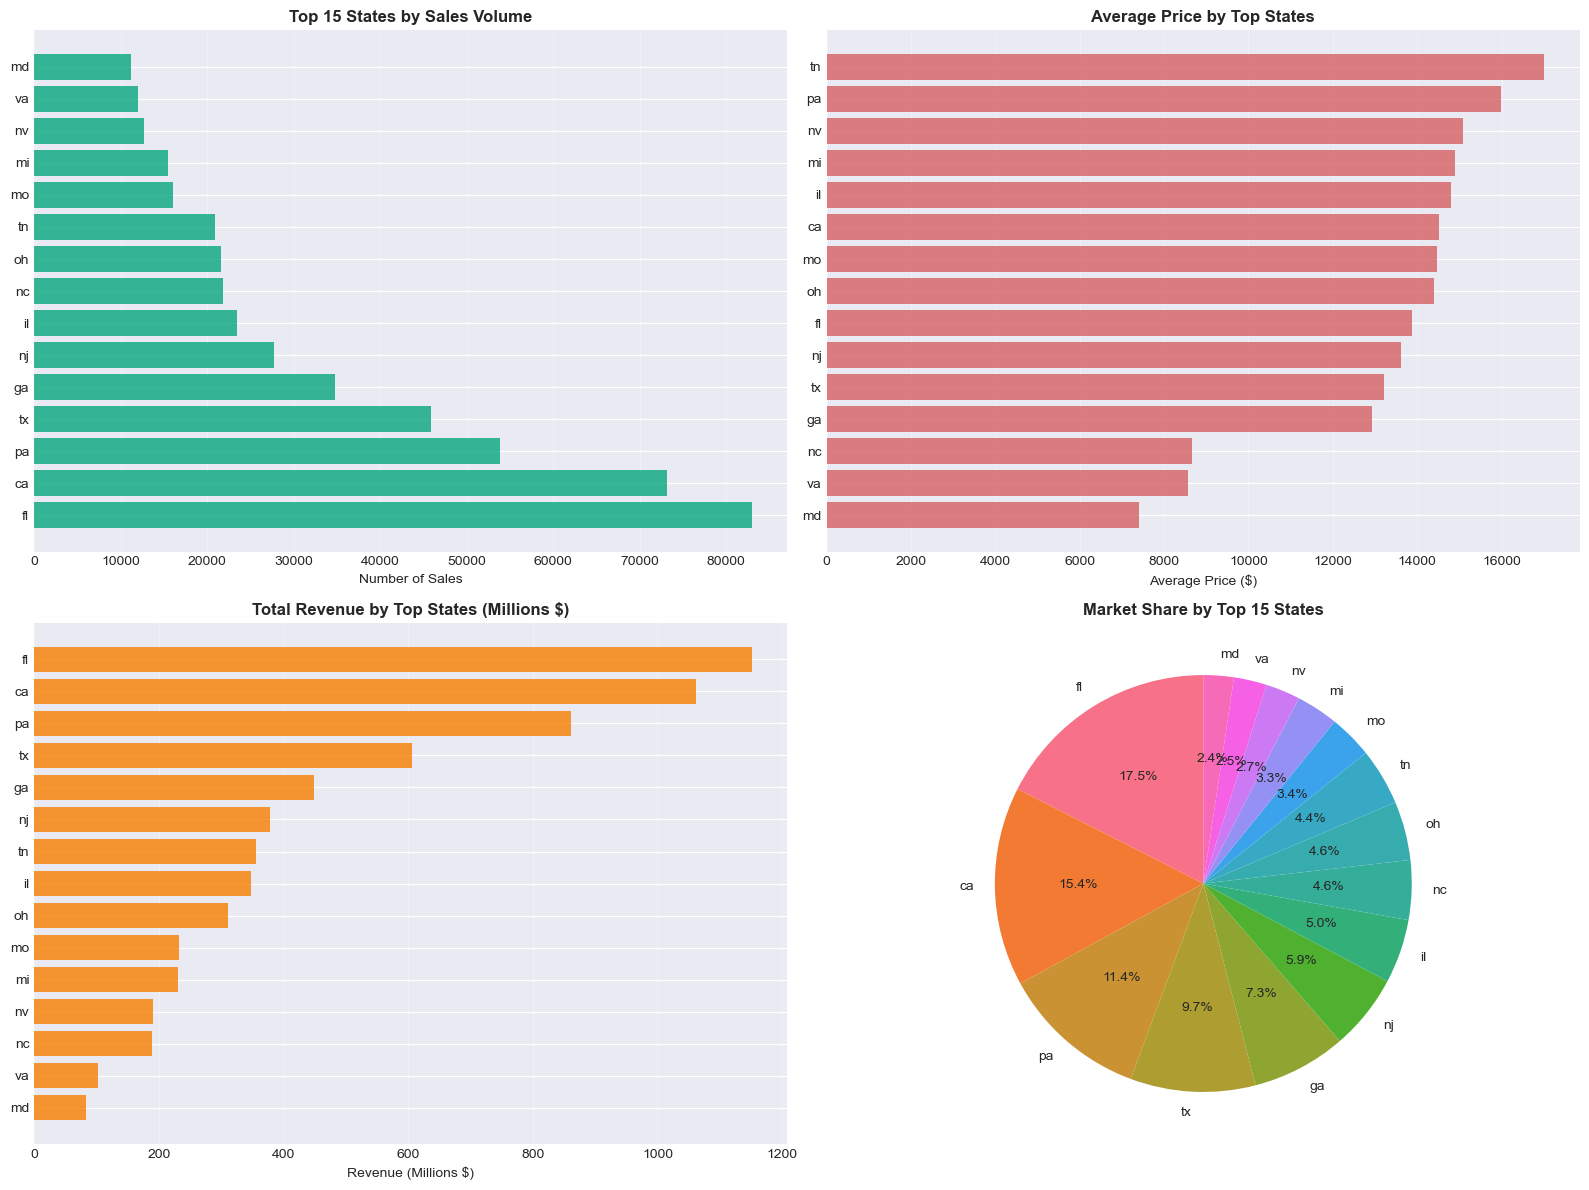

=== GEOGRAPHIC ANALYSIS INSIGHTS ===
Total unique states: 64

Top 5 States by Sales Volume:
state  sales_count    avg_price  total_revenue
   fl        82945 13877.443559   1151064556.0
   ca        73148 14505.902786   1061077777.0
   pa        53907 15976.303133    861234573.0
   tx        45913 13209.665258    606495361.0
   ga        34750 12918.774504    448927414.0

Top 5 States by Average Price:
state    avg_price  sales_count
   on 17812.623475         3442
   tn 17009.744341        20895
   pa 15976.303133        53907
   co 15877.798714         7775
   nv 15097.772014        12685

Top 5 States by Total Revenue:
state  total_revenue  sales_count
   fl   1151064556.0        82945
   ca   1061077777.0        73148
   pa    861234573.0        53907
   tx    606495361.0        45913
   ga    448927414.0        34750


In [50]:
# State analysis
state_analysis = df.groupby('state').agg({
    'sellingprice': ['count', 'sum', 'mean'],
    'odometer': 'mean',
    'vehicle_age': 'mean'
}).reset_index()
state_analysis.columns = ['state', 'sales_count', 'total_revenue', 'avg_price', 'avg_odometer', 'avg_age']
state_analysis = state_analysis.sort_values('sales_count', ascending=False)

# Top 15 states
top_states = state_analysis.head(15)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sales count by state
axes[0, 0].barh(top_states['state'], top_states['sales_count'], color='#06A77D', alpha=0.8)
axes[0, 0].set_title('Top 15 States by Sales Volume', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Sales')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Average price by state
top_states_price = top_states.sort_values('avg_price', ascending=True)
axes[0, 1].barh(top_states_price['state'], top_states_price['avg_price'], color='#D56062', alpha=0.8)
axes[0, 1].set_title('Average Price by Top States', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Average Price ($)')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Total revenue by state
top_states_rev = top_states.sort_values('total_revenue', ascending=True)
axes[1, 0].barh(top_states_rev['state'], top_states_rev['total_revenue']/1e6, color='#F77F00', alpha=0.8)
axes[1, 0].set_title('Total Revenue by Top States (Millions $)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Revenue (Millions $)')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Market share pie chart
axes[1, 1].pie(top_states['sales_count'], labels=top_states['state'], autopct='%1.1f%%', 
               startangle=90, colors=sns.color_palette("husl", len(top_states)))
axes[1, 1].set_title('Market Share by Top 15 States', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('state_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=== GEOGRAPHIC ANALYSIS INSIGHTS ===")
print(f"Total unique states: {df['state'].nunique()}")
print(f"\nTop 5 States by Sales Volume:")
print(top_states[['state', 'sales_count', 'avg_price', 'total_revenue']].head().to_string(index=False))
print(f"\nTop 5 States by Average Price:")
print(state_analysis.sort_values('avg_price', ascending=False)[['state', 'avg_price', 'sales_count']].head().to_string(index=False))
print(f"\nTop 5 States by Total Revenue:")
print(state_analysis.sort_values('total_revenue', ascending=False)[['state', 'total_revenue', 'sales_count']].head().to_string(index=False))


### 6. Geographic Distribution - Where are vehicles selling?

**Question**: Which states have the highest sales volume?

Regional differences might reflect population, economy, or consumer preferences.

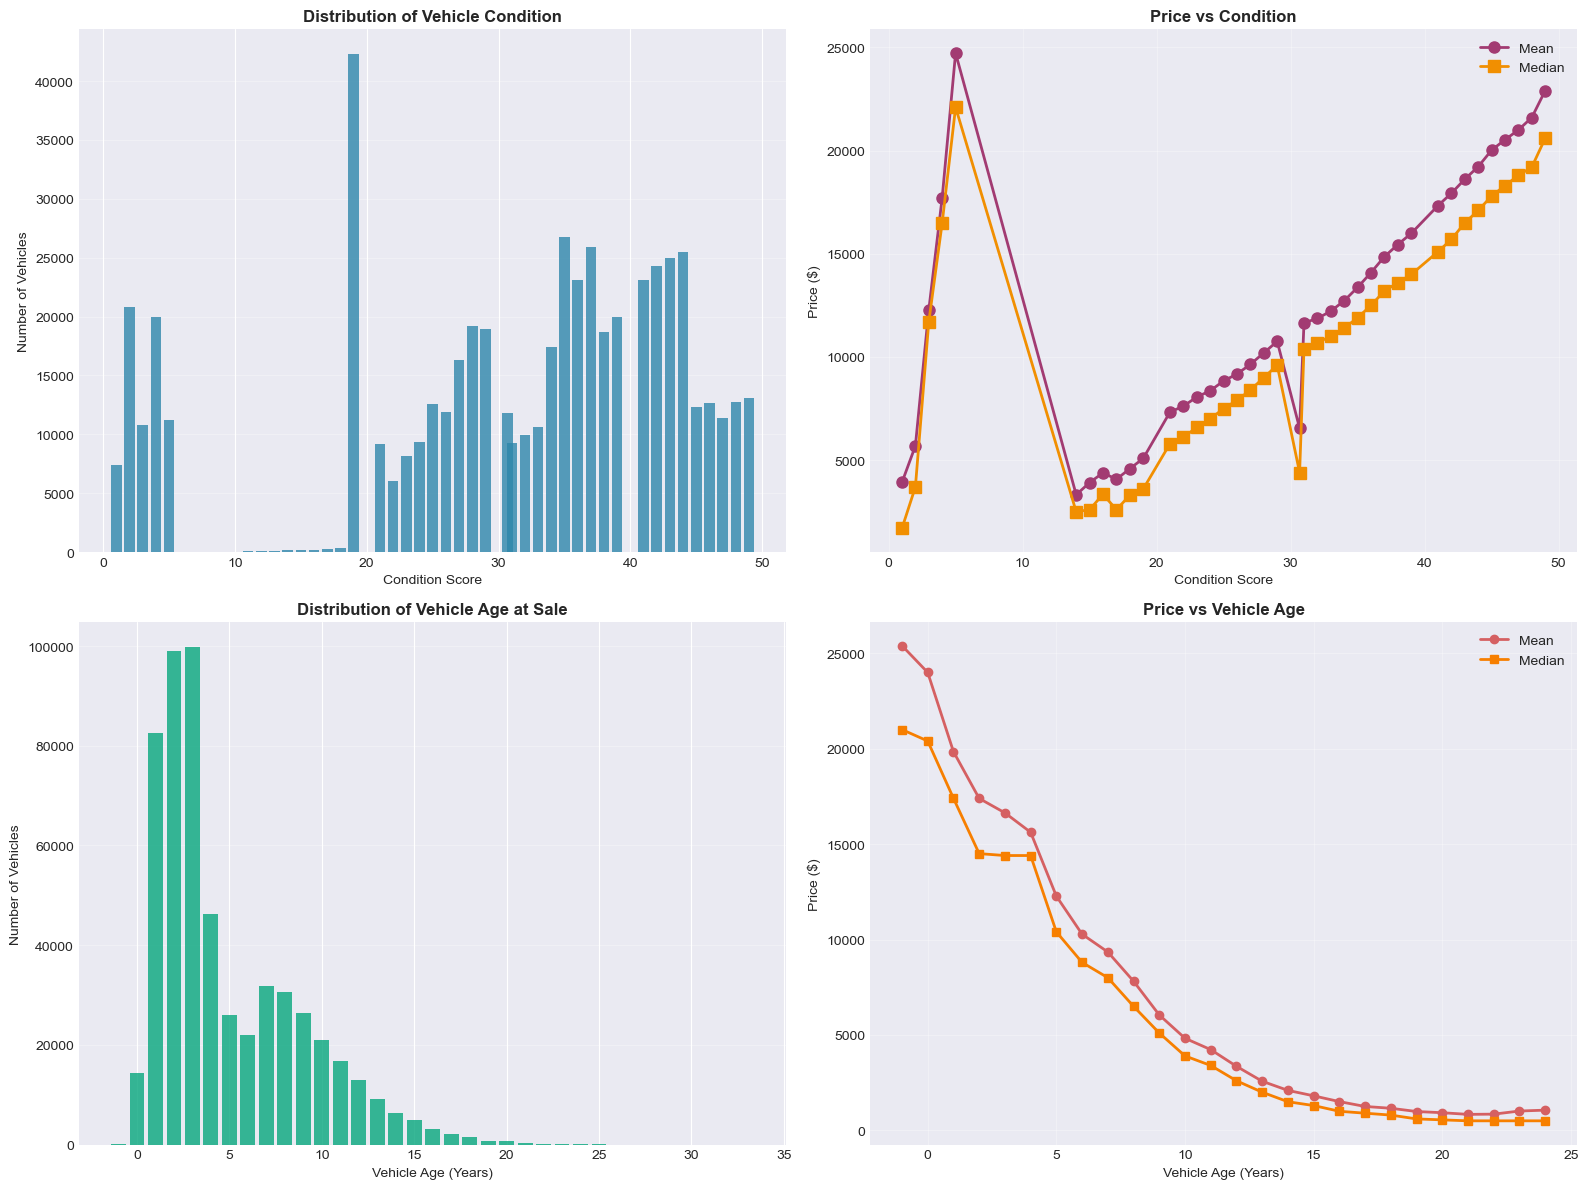

=== CONDITION & AGE INSIGHTS ===
Condition Statistics:
  Mean: 30.67
  Median: 34.00
  Range: 1 to 49

Vehicle Age Statistics:
  Mean: 4.87 years
  Median: 3 years
  Range: -1 to 33 years

Age Category Distribution:
age_category
New         97011
Recent     198830
Used        72244
Older      131488
Vintage     59037
Name: count, dtype: int64


In [51]:
# Condition and age analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Condition distribution
condition_counts = df['condition'].value_counts().sort_index()
axes[0, 0].bar(condition_counts.index, condition_counts.values, color='#2E86AB', alpha=0.8)
axes[0, 0].set_title('Distribution of Vehicle Condition', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Condition Score')
axes[0, 0].set_ylabel('Number of Vehicles')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Price by condition
condition_price = df.groupby('condition')['sellingprice'].agg(['mean', 'median', 'count']).reset_index()
condition_price = condition_price[condition_price['count'] >= 100]  # Filter conditions with sufficient data
axes[0, 1].plot(condition_price['condition'], condition_price['mean'], marker='o', linewidth=2, markersize=8, label='Mean', color='#A23B72')
axes[0, 1].plot(condition_price['condition'], condition_price['median'], marker='s', linewidth=2, markersize=8, label='Median', color='#F18F01')
axes[0, 1].set_title('Price vs Condition', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Condition Score')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Vehicle age distribution
age_counts = df['vehicle_age'].value_counts().sort_index()
axes[1, 0].bar(age_counts.index, age_counts.values, color='#06A77D', alpha=0.8, width=0.8)
axes[1, 0].set_title('Distribution of Vehicle Age at Sale', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Vehicle Age (Years)')
axes[1, 0].set_ylabel('Number of Vehicles')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Price by vehicle age
age_price = df.groupby('vehicle_age')['sellingprice'].agg(['mean', 'median', 'count']).reset_index()
age_price = age_price[age_price['count'] >= 50]  # Filter ages with sufficient data
axes[1, 1].plot(age_price['vehicle_age'], age_price['mean'], marker='o', linewidth=2, markersize=6, label='Mean', color='#D56062')
axes[1, 1].plot(age_price['vehicle_age'], age_price['median'], marker='s', linewidth=2, markersize=6, label='Median', color='#F77F00')
axes[1, 1].set_title('Price vs Vehicle Age', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Vehicle Age (Years)')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('condition_age_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=== CONDITION & AGE INSIGHTS ===")
print(f"Condition Statistics:")
print(f"  Mean: {df['condition'].mean():.2f}")
print(f"  Median: {df['condition'].median():.2f}")
print(f"  Range: {df['condition'].min():.0f} to {df['condition'].max():.0f}")
print(f"\nVehicle Age Statistics:")
print(f"  Mean: {df['vehicle_age'].mean():.2f} years")
print(f"  Median: {df['vehicle_age'].median():.0f} years")
print(f"  Range: {df['vehicle_age'].min():.0f} to {df['vehicle_age'].max():.0f} years")
print(f"\nAge Category Distribution:")
print(df['age_category'].value_counts().sort_index())


### 7. Condition & Age Analysis - How do these factors affect price?

**Question**: Do newer vehicles in better condition sell for more?

I expect to see clear relationships, but let's confirm with a scatter plot.

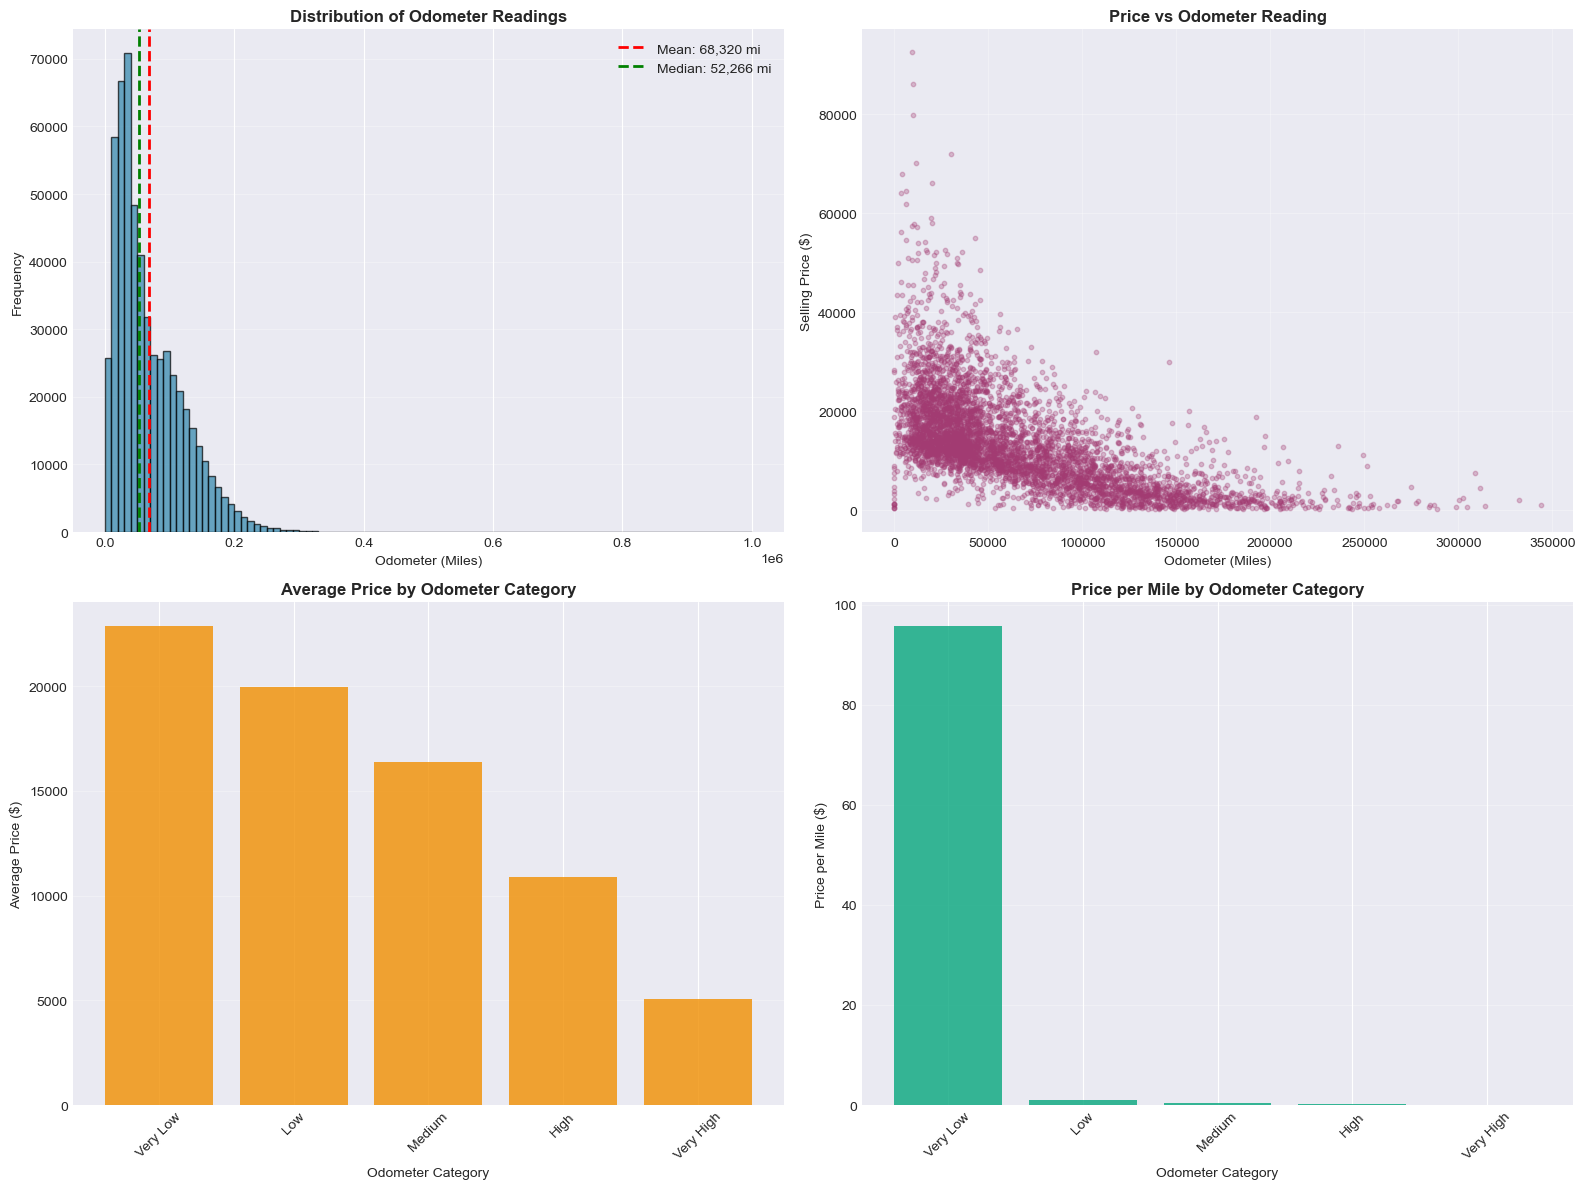

=== ODOMETER INSIGHTS ===
Odometer Statistics:
  Mean: 68,320 miles
  Median: 52,266 miles
  Std Dev: 53,394 miles
  Min: 1 miles
  Max: 999,999 miles

Odometer Category Distribution:
odometer_category
Very Low      25787
Low          125220
Medium       160163
High         110405
Very High    137262
Name: count, dtype: int64

Average Price per Mile: $4.81

Price by Odometer Category:
odometer_category         mean  count
         Very Low 22850.161826  25787
              Low 19975.932759 125220
           Medium 16377.747328 160163
             High 10859.345428 110405
        Very High  5055.094076 137262


In [52]:
# Odometer analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Odometer distribution
axes[0, 0].hist(df['odometer'], bins=100, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Distribution of Odometer Readings', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Odometer (Miles)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['odometer'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["odometer"].mean():,.0f} mi')
axes[0, 0].axvline(df['odometer'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["odometer"].median():,.0f} mi')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Price vs Odometer
sample_size = min(5000, len(df))
sample_df = df.sample(n=sample_size, random_state=42)
axes[0, 1].scatter(sample_df['odometer'], sample_df['sellingprice'], alpha=0.3, s=10, color='#A23B72')
axes[0, 1].set_title('Price vs Odometer Reading', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Odometer (Miles)')
axes[0, 1].set_ylabel('Selling Price ($)')
axes[0, 1].grid(True, alpha=0.3)

# Price by odometer category
odometer_cat_price = df.groupby('odometer_category')['sellingprice'].agg(['mean', 'median', 'count']).reset_index()
odometer_cat_order = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
odometer_cat_price['odometer_category'] = pd.Categorical(odometer_cat_price['odometer_category'], 
                                                          categories=odometer_cat_order, ordered=True)
odometer_cat_price = odometer_cat_price.sort_values('odometer_category')
axes[1, 0].bar(odometer_cat_price['odometer_category'], odometer_cat_price['mean'], color='#F18F01', alpha=0.8)
axes[1, 0].set_title('Average Price by Odometer Category', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Odometer Category')
axes[1, 0].set_ylabel('Average Price ($)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Price per mile by odometer category
odometer_cat_ppm = df.groupby('odometer_category')['price_per_mile'].mean().reset_index()
odometer_cat_ppm['odometer_category'] = pd.Categorical(odometer_cat_ppm['odometer_category'], 
                                                        categories=odometer_cat_order, ordered=True)
odometer_cat_ppm = odometer_cat_ppm.sort_values('odometer_category')
axes[1, 1].bar(odometer_cat_ppm['odometer_category'], odometer_cat_ppm['price_per_mile'], color='#06A77D', alpha=0.8)
axes[1, 1].set_title('Price per Mile by Odometer Category', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Odometer Category')
axes[1, 1].set_ylabel('Price per Mile ($)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('odometer_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=== ODOMETER INSIGHTS ===")
print(f"Odometer Statistics:")
print(f"  Mean: {df['odometer'].mean():,.0f} miles")
print(f"  Median: {df['odometer'].median():,.0f} miles")
print(f"  Std Dev: {df['odometer'].std():,.0f} miles")
print(f"  Min: {df['odometer'].min():,.0f} miles")
print(f"  Max: {df['odometer'].max():,.0f} miles")
print(f"\nOdometer Category Distribution:")
print(df['odometer_category'].value_counts().sort_index())
print(f"\nAverage Price per Mile: ${df['price_per_mile'].mean():.2f}")
print(f"\nPrice by Odometer Category:")
print(odometer_cat_price[['odometer_category', 'mean', 'count']].to_string(index=False))


### 8. Odometer (Mileage) Analysis - Does mileage matter?

**Question**: How does mileage correlate with selling price?

Higher mileage typically means more wear, which should lower the value.

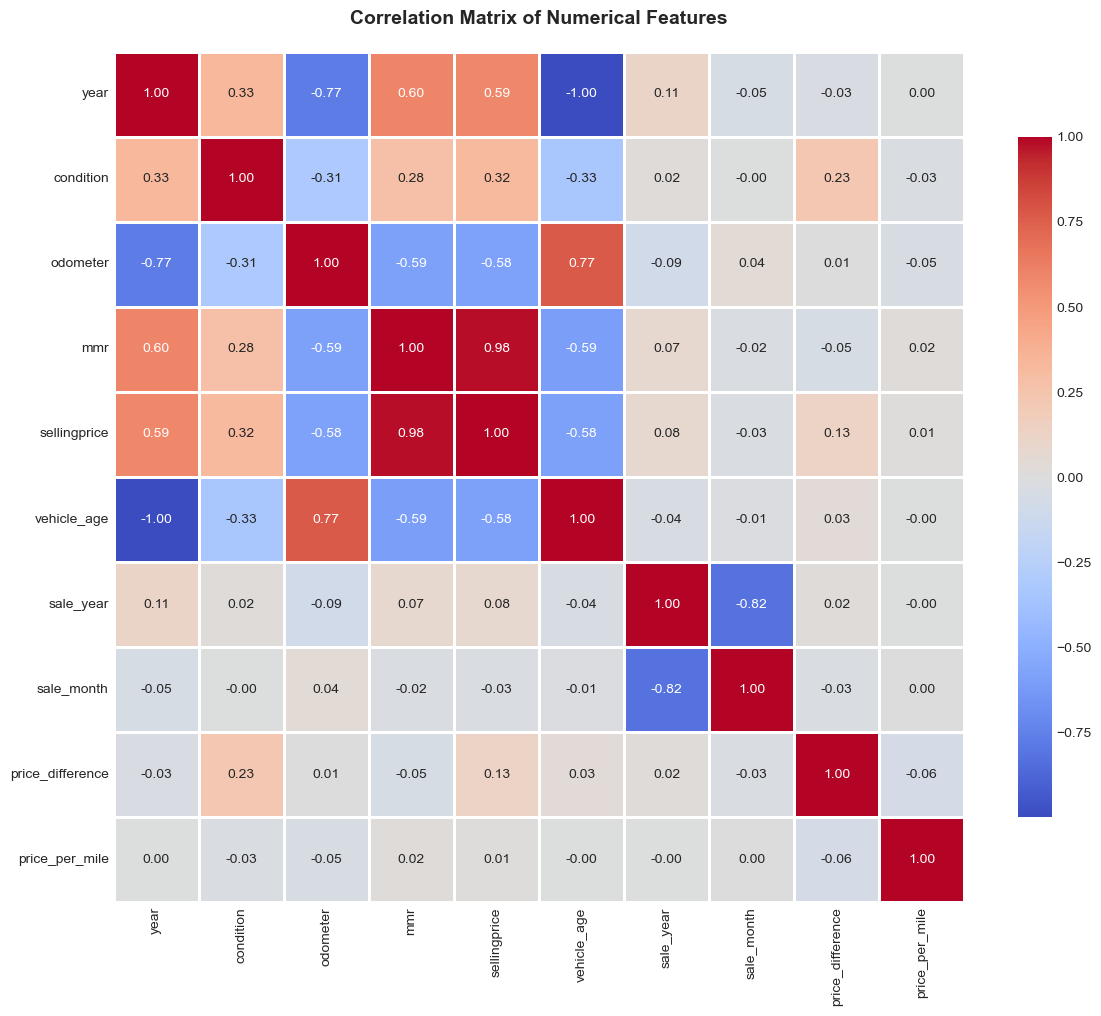

=== CORRELATION ANALYSIS ===

Top Features Correlated with Selling Price:
sellingprice        1.000000
mmr                 0.983635
year                0.586477
condition           0.318466
price_difference    0.129724
sale_year           0.076988
price_per_mile      0.012738
sale_month         -0.029423
odometer           -0.582322
vehicle_age        -0.584135

Strongest positive correlation: mmr (0.984)
Strongest negative correlation: vehicle_age (-0.584)


In [53]:
# Correlation analysis
numerical_features = ['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'vehicle_age', 
                      'sale_year', 'sale_month', 'price_difference', 'price_per_mile']
correlation_data = df[numerical_features].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_data, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with selling price
price_correlations = correlation_data['sellingprice'].sort_values(ascending=False)
print("=== CORRELATION ANALYSIS ===")
print(f"\nTop Features Correlated with Selling Price:")
print(price_correlations.to_string())
print(f"\nStrongest positive correlation: {price_correlations.drop('sellingprice').idxmax()} ({price_correlations.drop('sellingprice').max():.3f})")
print(f"Strongest negative correlation: {price_correlations.drop('sellingprice').idxmin()} ({price_correlations.drop('sellingprice').min():.3f})")


### 9. Correlation Analysis - Which features relate to each other?

**Question**: What's the relationship between numerical features?

A heatmap shows which variables are positively or negatively correlated. This is especially important for understanding what influences price.

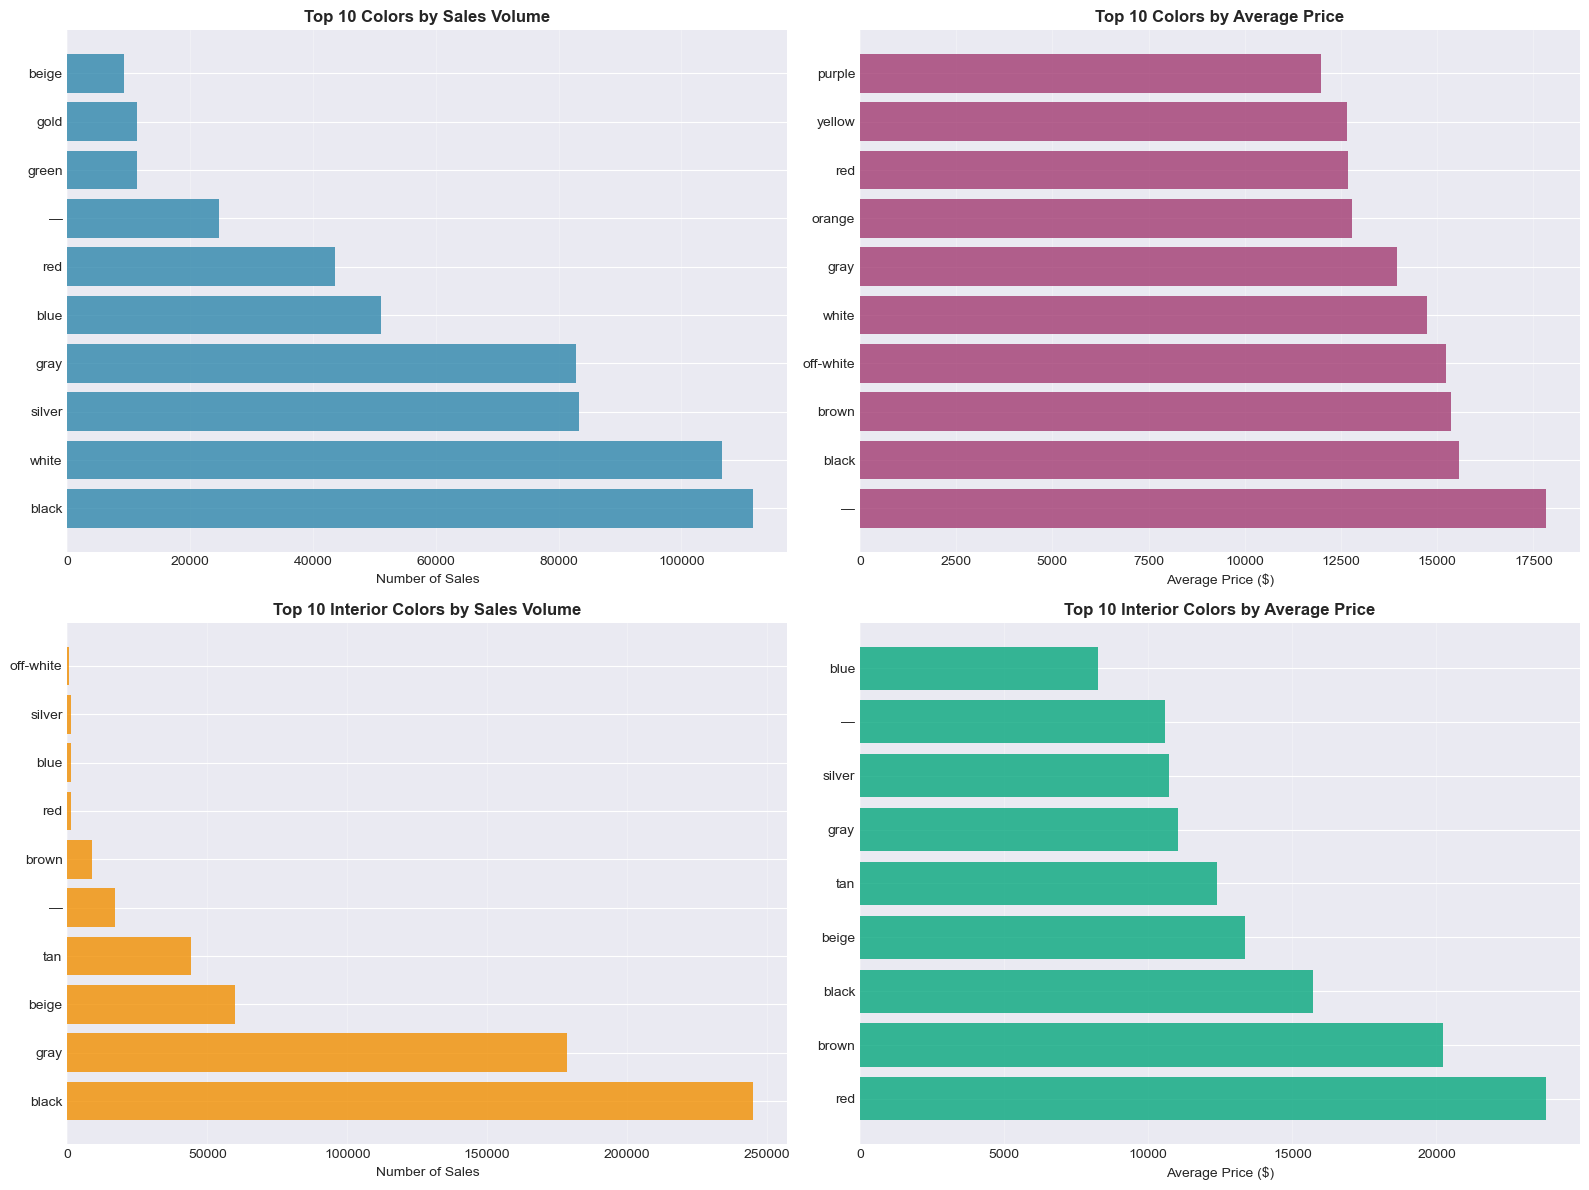

=== COLOR & INTERIOR INSIGHTS ===

Most Popular Exterior Colors:
color
black     111719
white     106673
silver     83389
gray       82857
blue       51139
red        43569
—          24685
green      11382
gold       11342
beige       9222

Highest Priced Exterior Colors:
    color         mean
        — 17819.737249
    black 15554.476816
    brown 15352.808099
off-white 15230.229814
    white 14740.666805
     gray 13951.460566
   orange 12787.109240
      red 12688.912002
   yellow 12652.202335
   purple 11969.684817

Most Popular Interior Colors:
interior
black        245078
gray         178581
beige         59758
tan           44093
—             17077
brown          8640
red            1363
blue           1143
silver         1104
off-white       480

Highest Priced Interior Colors:
interior         mean
     red 23789.086574
   brown 20241.964815
   black 15699.684948
   beige 13348.510794
     tan 12387.274012
    gray 11027.038986
  silver 10709.556159
       — 10593.760693
  

In [54]:
# Color and interior analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top colors by sales count
top_colors = df['color'].value_counts().head(10)
axes[0, 0].barh(top_colors.index, top_colors.values, color='#2E86AB', alpha=0.8)
axes[0, 0].set_title('Top 10 Colors by Sales Volume', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Number of Sales')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Average price by top colors
color_price = df.groupby('color')['sellingprice'].agg(['mean', 'count']).reset_index()
color_price = color_price[color_price['count'] >= 1000]  # Filter colors with sufficient data
color_price = color_price.sort_values('mean', ascending=False).head(10)
axes[0, 1].barh(color_price['color'], color_price['mean'], color='#A23B72', alpha=0.8)
axes[0, 1].set_title('Top 10 Colors by Average Price', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Average Price ($)')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Top interiors by sales count
top_interiors = df['interior'].value_counts().head(10)
axes[1, 0].barh(top_interiors.index, top_interiors.values, color='#F18F01', alpha=0.8)
axes[1, 0].set_title('Top 10 Interior Colors by Sales Volume', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Sales')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Average price by top interiors
interior_price = df.groupby('interior')['sellingprice'].agg(['mean', 'count']).reset_index()
interior_price = interior_price[interior_price['count'] >= 1000]  # Filter interiors with sufficient data
interior_price = interior_price.sort_values('mean', ascending=False).head(10)
axes[1, 1].barh(interior_price['interior'], interior_price['mean'], color='#06A77D', alpha=0.8)
axes[1, 1].set_title('Top 10 Interior Colors by Average Price', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Average Price ($)')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('color_interior_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=== COLOR & INTERIOR INSIGHTS ===")
print(f"\nMost Popular Exterior Colors:")
print(top_colors.to_string())
print(f"\nHighest Priced Exterior Colors:")
print(color_price[['color', 'mean']].head(10).to_string(index=False))
print(f"\nMost Popular Interior Colors:")
print(top_interiors.to_string())
print(f"\nHighest Priced Interior Colors:")
print(interior_price[['interior', 'mean']].head(10).to_string(index=False))


### 10. Color & Interior Analysis - Do colors affect popularity or price?

**Question**: Which colors are most common? Do certain colors command higher prices?

This is a fun exploratory question that could reveal consumer preferences.

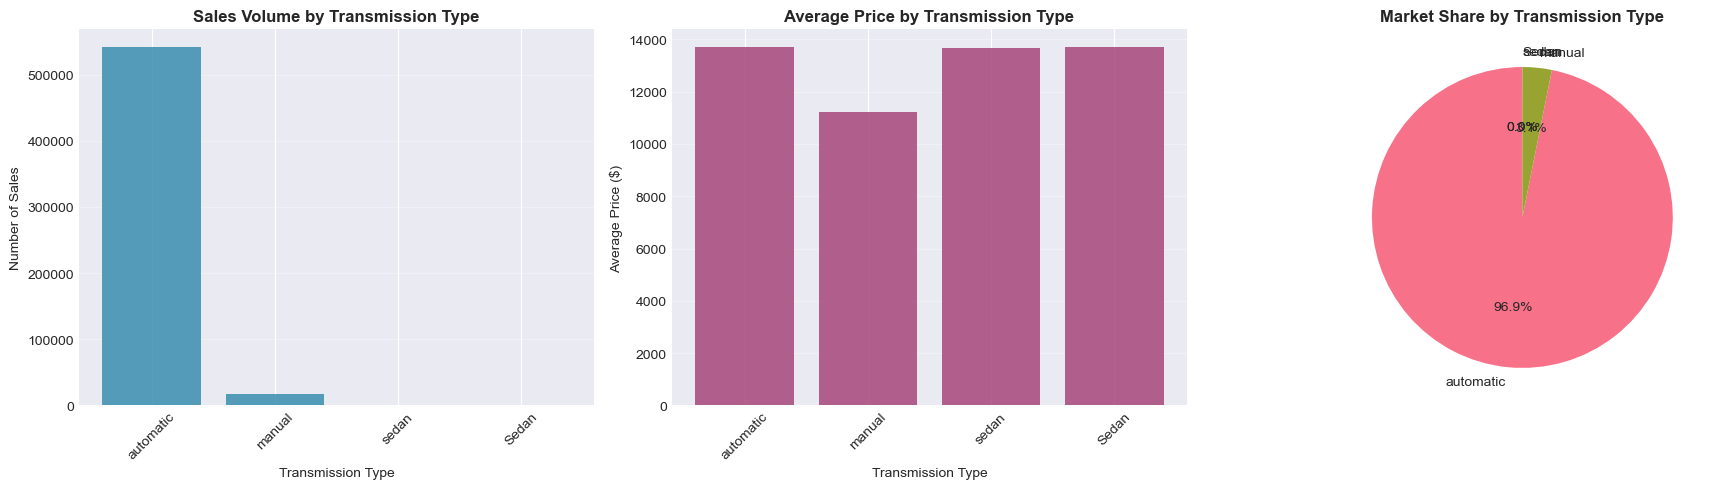

=== TRANSMISSION ANALYSIS INSIGHTS ===
transmission  sales_count    avg_price  total_revenue
   automatic       541267 13689.144125   7.409482e+09
      manual        17544 11211.448358   1.966936e+08
       sedan           15 13650.000000   2.047500e+05
       Sedan           11 13686.363636   1.505500e+05


In [55]:
# Transmission analysis
transmission_analysis = df.groupby('transmission').agg({
    'sellingprice': ['count', 'sum', 'mean', 'median'],
    'odometer': 'mean',
    'vehicle_age': 'mean'
}).reset_index()
transmission_analysis.columns = ['transmission', 'sales_count', 'total_revenue', 'avg_price', 'median_price', 'avg_odometer', 'avg_age']
transmission_analysis = transmission_analysis.sort_values('sales_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sales count by transmission
axes[0].bar(transmission_analysis['transmission'], transmission_analysis['sales_count'], color='#2E86AB', alpha=0.8)
axes[0].set_title('Sales Volume by Transmission Type', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Transmission Type')
axes[0].set_ylabel('Number of Sales')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# Average price by transmission
axes[1].bar(transmission_analysis['transmission'], transmission_analysis['avg_price'], color='#A23B72', alpha=0.8)
axes[1].set_title('Average Price by Transmission Type', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Transmission Type')
axes[1].set_ylabel('Average Price ($)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# Market share pie chart
axes[2].pie(transmission_analysis['sales_count'], labels=transmission_analysis['transmission'], 
           autopct='%1.1f%%', startangle=90, colors=sns.color_palette("husl", len(transmission_analysis)))
axes[2].set_title('Market Share by Transmission Type', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('transmission_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=== TRANSMISSION ANALYSIS INSIGHTS ===")
print(transmission_analysis[['transmission', 'sales_count', 'avg_price', 'total_revenue']].to_string(index=False))


### 11. Transmission Type - Manual vs. Automatic preferences

**Question**: What's the split between transmission types?

Most modern cars are automatic, but let's verify what the auction data shows.

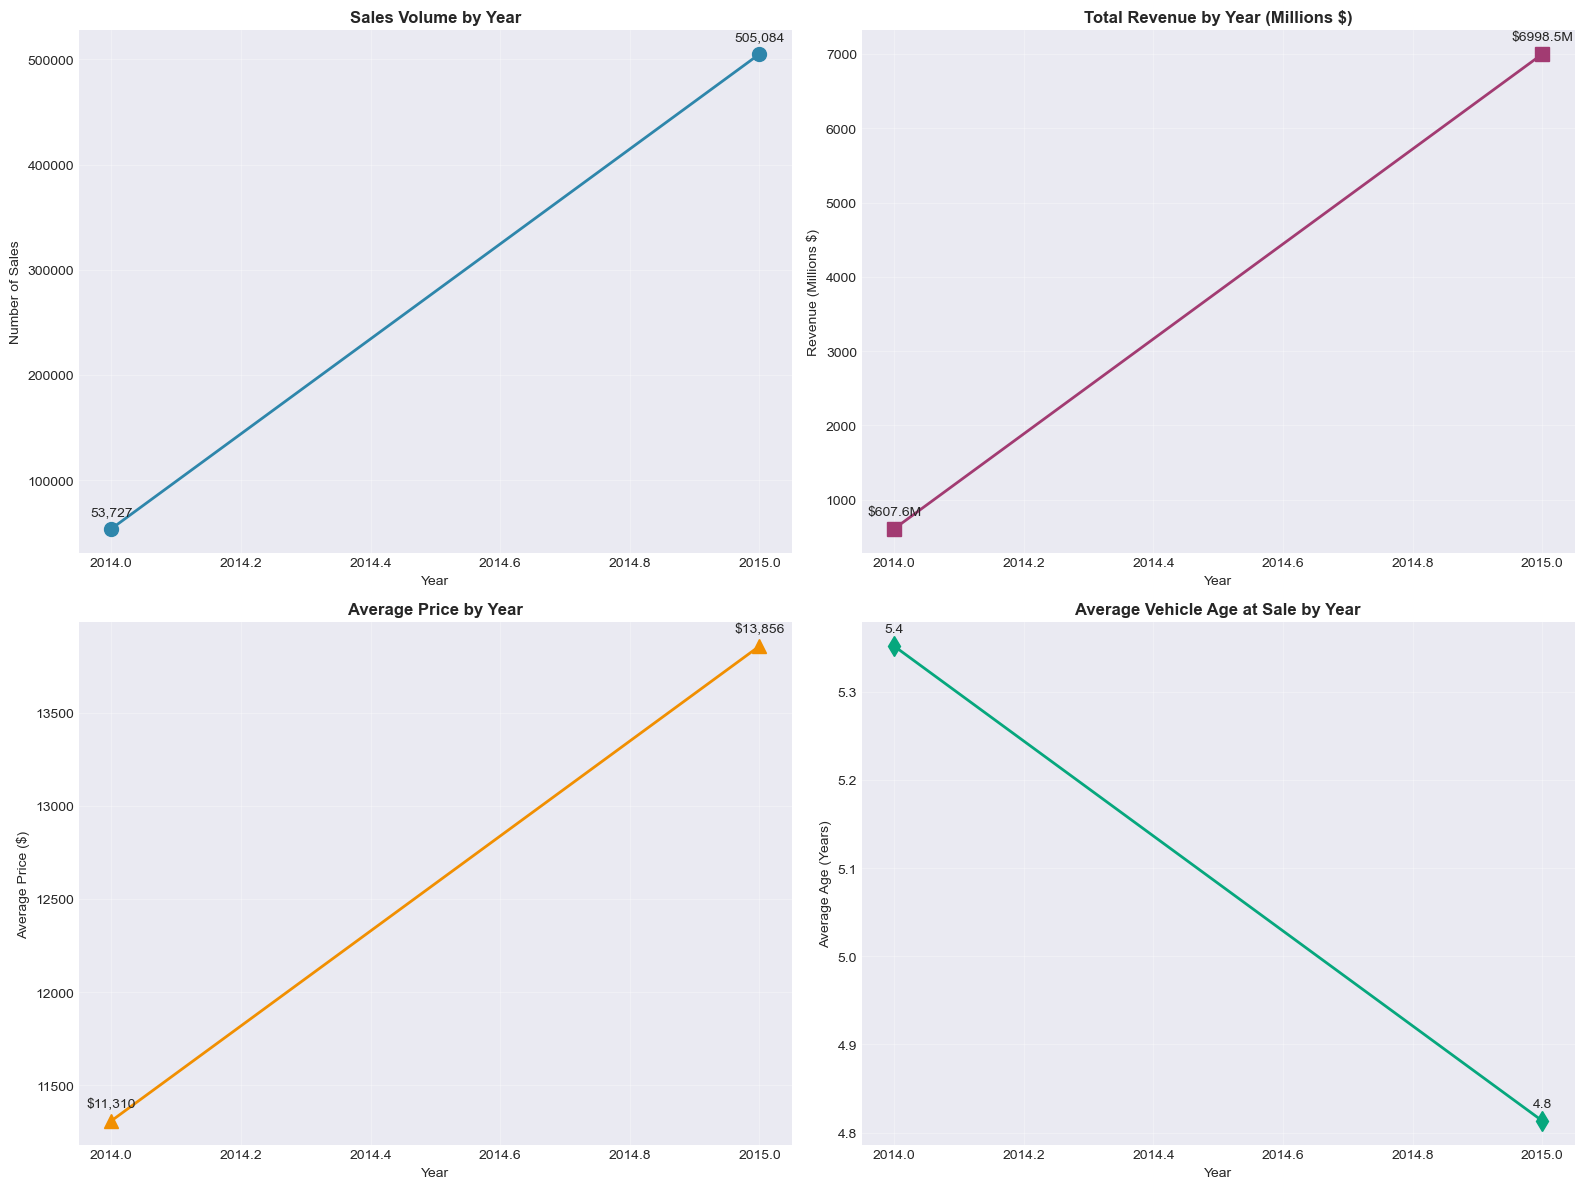

=== YEAR-OVER-YEAR INSIGHTS ===
  year  sales_count  total_revenue    avg_price  avg_odometer  avg_age
2014.0        53727   6.076492e+08 11309.941556  82458.712235 5.351481
2015.0       505084   6.998526e+09 13856.163318  66819.566321 4.813427

Growth Metrics:
  Sales volume growth: 840.09%
  Revenue growth: 1051.74%
  Average price growth: 22.51%


In [56]:
# Year-over-year analysis
yoy_analysis = df.groupby('sale_year').agg({
    'sellingprice': ['count', 'sum', 'mean'],
    'odometer': 'mean',
    'vehicle_age': 'mean'
}).reset_index()
yoy_analysis.columns = ['year', 'sales_count', 'total_revenue', 'avg_price', 'avg_odometer', 'avg_age']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sales count by year
axes[0, 0].plot(yoy_analysis['year'], yoy_analysis['sales_count'], marker='o', linewidth=2, markersize=10, color='#2E86AB')
axes[0, 0].set_title('Sales Volume by Year', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Sales')
axes[0, 0].grid(True, alpha=0.3)
for i, (year, count) in enumerate(zip(yoy_analysis['year'], yoy_analysis['sales_count'])):
    axes[0, 0].annotate(f'{count:,.0f}', (year, count), textcoords="offset points", xytext=(0,10), ha='center')

# Total revenue by year
axes[0, 1].plot(yoy_analysis['year'], yoy_analysis['total_revenue']/1e6, marker='s', linewidth=2, markersize=10, color='#A23B72')
axes[0, 1].set_title('Total Revenue by Year (Millions $)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Revenue (Millions $)')
axes[0, 1].grid(True, alpha=0.3)
for i, (year, rev) in enumerate(zip(yoy_analysis['year'], yoy_analysis['total_revenue'])):
    axes[0, 1].annotate(f'${rev/1e6:.1f}M', (year, rev/1e6), textcoords="offset points", xytext=(0,10), ha='center')

# Average price by year
axes[1, 0].plot(yoy_analysis['year'], yoy_analysis['avg_price'], marker='^', linewidth=2, markersize=10, color='#F18F01')
axes[1, 0].set_title('Average Price by Year', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Average Price ($)')
axes[1, 0].grid(True, alpha=0.3)
for i, (year, price) in enumerate(zip(yoy_analysis['year'], yoy_analysis['avg_price'])):
    axes[1, 0].annotate(f'${price:,.0f}', (year, price), textcoords="offset points", xytext=(0,10), ha='center')

# Average vehicle age by year
axes[1, 1].plot(yoy_analysis['year'], yoy_analysis['avg_age'], marker='d', linewidth=2, markersize=10, color='#06A77D')
axes[1, 1].set_title('Average Vehicle Age at Sale by Year', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average Age (Years)')
axes[1, 1].grid(True, alpha=0.3)
for i, (year, age) in enumerate(zip(yoy_analysis['year'], yoy_analysis['avg_age'])):
    axes[1, 1].annotate(f'{age:.1f}', (year, age), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.savefig('yoy_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=== YEAR-OVER-YEAR INSIGHTS ===")
print(yoy_analysis.to_string(index=False))
print(f"\nGrowth Metrics:")
if len(yoy_analysis) > 1:
    sales_growth = ((yoy_analysis.iloc[-1]['sales_count'] - yoy_analysis.iloc[0]['sales_count']) / yoy_analysis.iloc[0]['sales_count']) * 100
    revenue_growth = ((yoy_analysis.iloc[-1]['total_revenue'] - yoy_analysis.iloc[0]['total_revenue']) / yoy_analysis.iloc[0]['total_revenue']) * 100
    price_growth = ((yoy_analysis.iloc[-1]['avg_price'] - yoy_analysis.iloc[0]['avg_price']) / yoy_analysis.iloc[0]['avg_price']) * 100
    print(f"  Sales volume growth: {sales_growth:.2f}%")
    print(f"  Revenue growth: {revenue_growth:.2f}%")
    print(f"  Average price growth: {price_growth:.2f}%")


### 12. Year-over-Year Comparison - 2014 vs. 2015 trends

**Question**: How do sales in 2014 compare to 2015?

Since our data spans December 2014 to July 2015, I'll compare the months they have in common.

In [57]:
# Comprehensive Business Insights Summary
print("="*80)
print("COMPREHENSIVE BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*80)

print("\n1. SALES PERFORMANCE OVERVIEW")
print("-" * 80)
print(f"   • Total Sales: {len(df):,} vehicles")
print(f"   • Total Revenue: ${df['sellingprice'].sum():,.2f}")
print(f"   • Average Sale Price: ${df['sellingprice'].mean():,.2f}")
print(f"   • Median Sale Price: ${df['sellingprice'].median():,.2f}")
print(f"   • Date Range: {df['sale_datetime'].min().date()} to {df['sale_datetime'].max().date()}")

print("\n2. TOP PERFORMING SEGMENTS")
print("-" * 80)
top_make = make_analysis.iloc[0]
top_model = model_analysis.iloc[0]
top_body = body_analysis.iloc[0]
top_state = state_analysis.iloc[0]
print(f"   • Top Make: {top_make['make']} ({top_make['sales_count']:,} sales, ${top_make['total_revenue']:,.2f} revenue)")
print(f"   • Top Model: {top_model['make']} {top_model['model']} ({top_model['sales_count']:,} sales)")
print(f"   • Top Body Type: {top_body['body_type']} ({top_body['sales_count']:,} sales, ${top_body['avg_price']:,.2f} avg price)")
print(f"   • Top State: {top_state['state'].upper()} ({top_state['sales_count']:,} sales, ${top_state['total_revenue']:,.2f} revenue)")

print("\n3. SEASONAL PATTERNS")
print("-" * 80)
best_month = monthly_pattern.loc[monthly_pattern['sales_count'].idxmax(), 'month_name']
worst_month = monthly_pattern.loc[monthly_pattern['sales_count'].idxmin(), 'month_name']
best_quarter = quarterly_pattern.loc[quarterly_pattern['sales_count'].idxmax(), 'quarter']
print(f"   • Best Month: {best_month} ({monthly_pattern['sales_count'].max():,} sales)")
print(f"   • Worst Month: {worst_month} ({monthly_pattern['sales_count'].min():,} sales)")
print(f"   • Best Quarter: Q{best_quarter} ({quarterly_pattern['sales_count'].max():,} sales)")
print(f"   • Best Day of Week: {dow_pattern.loc[dow_pattern['sales_count'].idxmax(), 'day']}")

print("\n4. PRICING INSIGHTS")
print("-" * 80)
print(f"   • Price Range: ${df['sellingprice'].min():,.2f} - ${df['sellingprice'].max():,.2f}")
print(f"   • Price vs MMR: {df['price_difference'].mean():,.2f} average difference ({df['price_difference_pct'].mean():.2f}%)")
above_mmr_pct = (df['price_difference'] > 0).sum() / len(df) * 100
print(f"   • Sales Above MMR: {above_mmr_pct:.1f}% of transactions")
print(f"   • Most Expensive Category: {df.groupby('price_category')['sellingprice'].mean().idxmax()}")

print("\n5. VEHICLE CHARACTERISTICS")
print("-" * 80)
print(f"   • Average Vehicle Age: {df['vehicle_age'].mean():.2f} years")
print(f"   • Average Odometer: {df['odometer'].mean():,.0f} miles")
print(f"   • Average Condition Score: {df['condition'].mean():.2f}")
print(f"   • Most Common Transmission: {df['transmission'].mode()[0]}")
print(f"   • Most Popular Color: {df['color'].mode()[0]}")

print("\n6. MARKET OPPORTUNITIES")
print("-" * 80)
# Find underperforming segments with potential
high_price_low_volume = make_analysis[(make_analysis['avg_price'] > make_analysis['avg_price'].quantile(0.75)) & 
                                      (make_analysis['sales_count'] < make_analysis['sales_count'].quantile(0.5))]
if len(high_price_low_volume) > 0:
    print(f"   • Premium Makes with Growth Potential:")
    for _, row in high_price_low_volume.head(3).iterrows():
        print(f"     - {row['make']}: ${row['avg_price']:,.2f} avg price, {row['sales_count']:,} sales")

print("\n7. FORECASTING FACTORS")
print("-" * 80)
print("   Key factors identified for sales forecasting:")
print("   • Time-based: Year, Month, Quarter, Day of Week")
print("   • Vehicle: Make, Model, Body Type, Year, Condition, Odometer, Age")
print("   • Geographic: State")
print("   • Market: MMR (Manheim Market Report)")
print("   • Derived: Price per Mile, Vehicle Age, Price Difference")

print("\n8. RECOMMENDATIONS")
print("-" * 80)
print("   A. INVENTORY MANAGEMENT:")
print("      • Focus on top-performing makes and models")
print(f"      • Prioritize {top_body['body_type']} body type inventory")
print(f"      • Stock more vehicles in {top_state['state'].upper()} state")
print("   B. PRICING STRATEGY:")
print("      • Monitor MMR closely for pricing decisions")
print(f"      • Consider seasonal pricing adjustments for {worst_month}")
print("      • Premium pricing opportunities in high-demand segments")
print("   C. MARKETING:")
print(f"      • Promote during {best_month} and Q{best_quarter} for maximum impact")
print(f"      • Target {top_make['make']} and {top_body['body_type']} segments")
print("   D. OPERATIONS:")
print(f"      • Optimize operations for {dow_pattern.loc[dow_pattern['sales_count'].idxmax(), 'day']} (peak sales day)")
print("      • Focus on popular colors and transmission types")

print("\n" + "="*80)
print("END OF BUSINESS INSIGHTS REPORT")
print("="*80)


COMPREHENSIVE BUSINESS INSIGHTS & RECOMMENDATIONS

1. SALES PERFORMANCE OVERVIEW
--------------------------------------------------------------------------------
   • Total Sales: 558,837 vehicles
   • Total Revenue: $7,606,530,923.31
   • Average Sale Price: $13,611.36
   • Median Sale Price: $12,100.00
   • Date Range: 2014-01-01 to 2015-07-21

2. TOP PERFORMING SEGMENTS
--------------------------------------------------------------------------------
   • Top Make: Ford (103,855 sales, $1,452,674,301.36 revenue)
   • Top Model: Nissan Altima (19,349 sales)
   • Top Body Type: Sedan (261,955 sales, $11,790.55 avg price)
   • Top State: FL (82,945 sales, $1,151,064,556.00 revenue)

3. SEASONAL PATTERNS
--------------------------------------------------------------------------------
   • Best Month: Feb (163,065 sales)
   • Worst Month: Jul (1,300 sales)
   • Best Quarter: Q1.0 (350,157 sales)
   • Best Day of Week: Wednesday

4. PRICING INSIGHTS
----------------------------------------

---

## Part 3: Feature Engineering for Future Forecasting

Now I'll create new columns that could be useful if I want to build a predictive model later. The goal is to have a "machine learning ready" dataset with all relevant features.

In [58]:
# Save the fully processed dataset with all new features
output_file_processed = 'car_prices_processed_for_forecasting.csv'
df.to_csv(output_file_processed, index=False)
print(f"Processed dataset saved to '{output_file_processed}'")
print(f"Final dataset shape: {df.shape}")
print(f"\nNew features added:")
print("  - sale_datetime, sale_date, sale_year, sale_month, sale_day, sale_dayofweek, sale_quarter, sale_hour, sale_week")
print("  - body_standardized")
print("  - vehicle_age, price_difference, price_difference_pct, price_per_mile")
print("  - price_category, age_category, odometer_category")
print(f"\nDataset is now ready for forecasting model development!")


Processed dataset saved to 'car_prices_processed_for_forecasting.csv'
Final dataset shape: (558837, 33)

New features added:
  - sale_datetime, sale_date, sale_year, sale_month, sale_day, sale_dayofweek, sale_quarter, sale_hour, sale_week
  - body_standardized
  - vehicle_age, price_difference, price_difference_pct, price_per_mile
  - price_category, age_category, odometer_category

Dataset is now ready for forecasting model development!
